In [9]:
import pandas as pd
from textblob import TextBlob
from textblob import classifiers
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn


In [6]:
df = pd.read_csv('clean_dataset.csv', sep = ';', encoding='latin-1')
df.head()

,productid,userid,score,text,clean_text,sentiment
0,B001E4KFG0,A3SGXH7AUHU8GW,5,I have bought several of the Vitality canned d...,i bought several vitality canned dog food prod...,positive
1,B00813GRG4,A1D87F6ZCVE5NK,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanuts ....,negative
2,B000LQOCH0,ABXLMWJIXXAIN,4,This is a confection that has been around a fe...,this confection around centuries it light pill...,positive
3,B000UA0QIQ,A395BORC6FGVXV,2,If you are looking for the secret ingredient i...,if looking secret ingredient robitussin i beli...,negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5,Great taffy at a great price. There was a wid...,great taffy great price there wide assortment ...,positive


## NaiveBayesClassifier with textblob

In [15]:
train_df = pd.DataFrame()
for productid_action in df['productid'].unique():
    productid_df = df.loc[df['productid'] == productid_action]
    n_instance = productid_df.shape[0]
    train_df = train_df.append(productid_df.sample(n = int(0.8 * n_instance), replace = False))

test_df = pd.concat([df, train_df]).drop_duplicates(keep=False)


In [17]:
train_df.shape

(25685, 6)

In [18]:
test_df.shape

(9465, 6)

In [19]:
train_df.to_csv('train_dataset.csv', sep = ';', index=False)
test_df.to_csv('test_dataset.csv', sep = ';', index=False)

In [20]:
training =[]
for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list =[rows.clean_text, rows.sentiment] 
      
    # append the list to the final list 
    training.append(my_list)

#Print the list 
training

[['i bought several vitality canned dog food products found good quality the product looks like stew processed meat smells better my labrador finicky appreciates product better',
  'positive'],
 ['product arrived labeled jumbo salted peanuts ... peanuts actually small sized unsalted not sure error vendor intended represent product jumbo',
  'negative'],
 ['this confection around centuries it light pillowy citrus gelatin nuts case filberts and cut tiny squares liberally coated powdered sugar and tiny mouthful heaven not chewy flavorful i highly recommend yummy treat if familiar story c s lewis the lion the witch the wardrobe treat seduces edmund selling brother sisters witch',
  'positive'],
 ['if looking secret ingredient robitussin i believe i found i got addition root beer extract i ordered good made cherry soda the flavor medicinal',
  'negative'],
 ['great taffy great price there wide assortment yummy taffy delivery quick if taffy lover deal',
  'positive'],
 ['i got wild hair taff

In [ ]:
# va troppo in swap
classifier = classifiers.NaiveBayesClassifier(training)

## Regressione con sklearn

In [21]:
# si può usare come label score che sono le stelle delle recensioni
# o su sentiment che è positive (4 5 stelle), neutral (3), negative (1, 2 stelle)
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['score'], random_state=0,
                                                            shuffle=True, train_size=0.80)

In [16]:
print(y_test.head())
print(X_train.shape)
print(X_test.shape)

16004    5
8601     5
14943    2
24062    5
13665    5
Name: score, dtype: int64
(28137,)
(7035,)


In [22]:
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_train_vectorized.toarray()

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


predictions = model.predict(vect.transform(X_test))


In [57]:
predictions = model.predict(vect.transform(X_test))
precision, recall, fscore, support = score(y_test, predictions)
accuracy = sklearn.metrics.accuracy_score(y_test, predictions, normalize=True, sample_weight=None)

In [58]:
conf_mat_a = sklearn.metrics.confusion_matrix(y_test, predictions)
conf_mat_a

array([[ 343,   56,   47,   33,  164],
       [  78,   79,   59,   56,  127],
       [  44,   42,  144,  107,  260],
       [  18,   19,   73,  256,  627],
       [  52,   30,   52,  221, 4048]])

In [62]:
accuracy

0.6922530206112296

## Cross-validation

In [26]:
from sklearn.model_selection import cross_val_score

vect_cv = CountVectorizer().fit(df['clean_text'])
clean_text_vect = vect_cv.transform(df['clean_text'])
clean_text_vect = clean_text_vect.toarray()


clf = LogisticRegression()
scores = cross_val_score(clf, clean_text_vect, df['score'], cv=10)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [27]:
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.70105144 0.66827743 0.69329164 0.68732234 0.66884594 0.68106879
 0.67074211 0.69510808 0.70611664 0.68904694]
Accuracy: 0.69 (+/- 0.03)


## LDA Analysis

In [37]:
product_df = df[['productid']]
most_reviwed_products = product_df['productid'].value_counts()[:50]
most_reviwed_products = list(most_reviwed_products.index)

basa_df = pd.DataFrame()
basa_df = basa_df.append(df[df['productid'].isin(most_reviwed_products)])

basa_df.head()

,productid,userid,score,text,clean_text,sentiment
422,B000G6RYNE,A2NO1TXXS9T0EE,4,"Great if you are cutting back on fat, they do ...",great cutting back fat resemble regular chips ...,positive
423,B000G6RYNE,A1IRN1M05TPOVT,5,I have never met a Kettle brand chip I did not...,i never met kettle brand chip i like these chi...,positive
424,B000G6RYNE,ARONI7W0W677H,5,After buying bags one at a time (at a hefty ma...,after buying bags one time hefty markup nearby...,positive
425,B000G6RYNE,A1Y3XPZK9ZADFW,4,"I buy mostly for vending, so the size of the b...",i buy mostly vending size bag important kettle...,positive
426,B000G6RYNE,A1Y3XPZK9ZADFW,4,Glad to find these in a one ounce size but the...,glad find one ounce size bag seems bit less fu...,positive


In [20]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


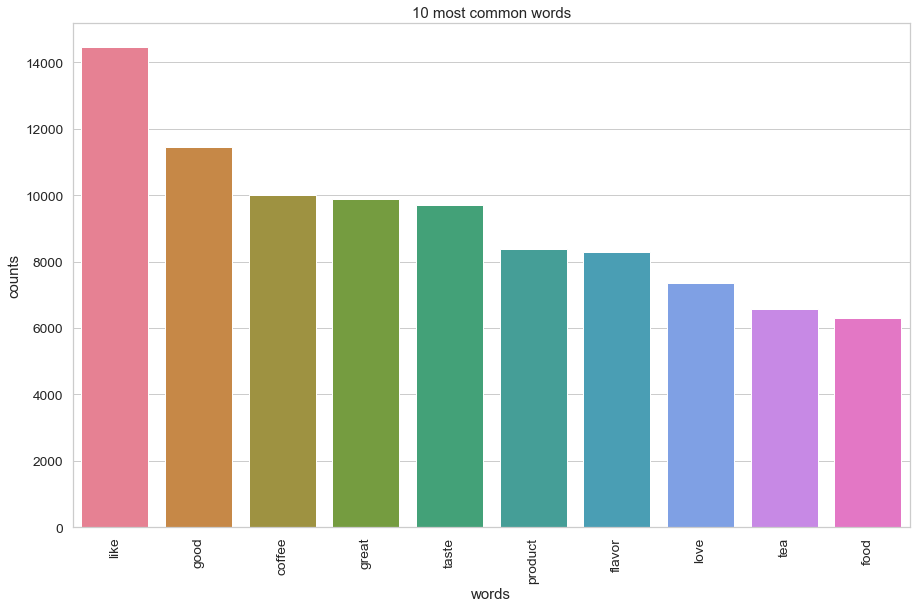

In [21]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['clean_text'])
plot_10_most_common_words(count_data, count_vectorizer)



In [17]:
count_data

<35172x31633 sparse matrix of type '<class 'numpy.int64'>'
	with 927877 stored elements in Compressed Sparse Row format>

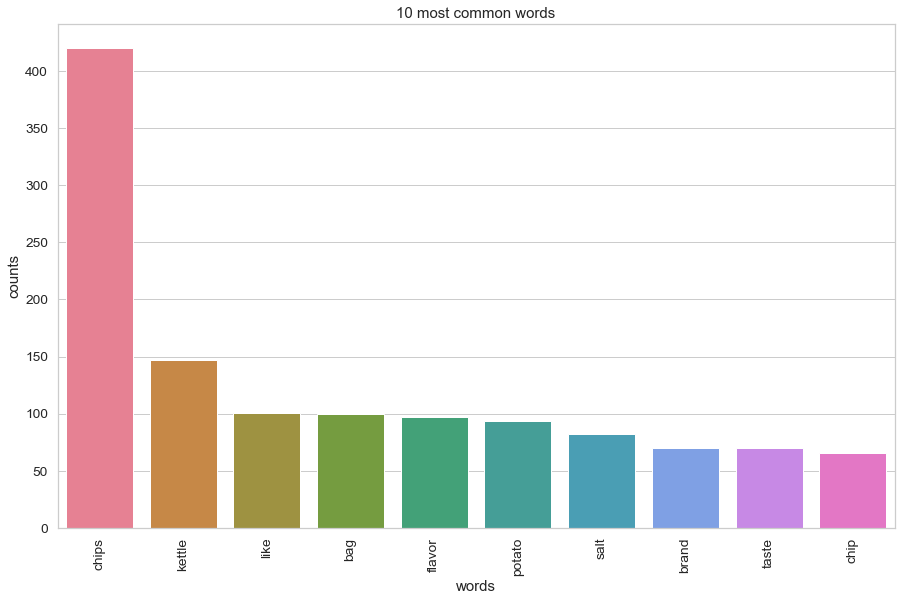

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Topics found via LDA:

Topic #0:
chips kettle like spicy flavors flavor potato crunchy thai know

Topic #1:
chips kettle flavor potato bag like chip salt great best

Topic #2:
chips kettle bag brand potato bags salt taste vinegar flavor

Topic #3:
food salt stale bought ve flavor enjoyed local happy flavoring

Topic #4:
chips good like great bag taste salt kettle bags price


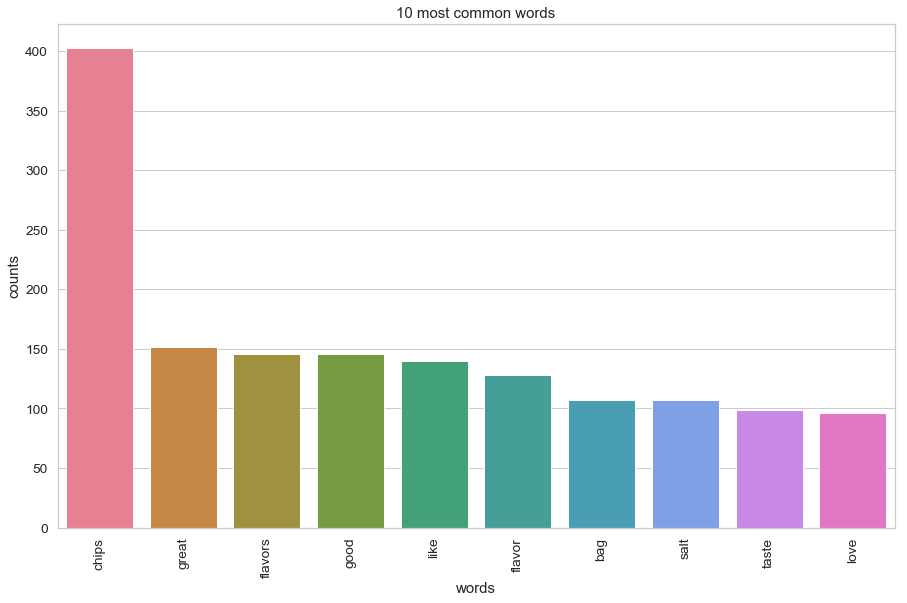

Topics found via LDA:

Topic #0:
chips product like potato bag good bags great ordered flavors

Topic #1:
chips great love flavors flavor variety snack amazon weight pop

Topic #2:
chips like flavor taste potato salt good chip really box

Topic #3:
chips great flavors good bag popchips love really snack calories

Topic #4:
chips good salt like flavors taste flavor vinegar pepper great


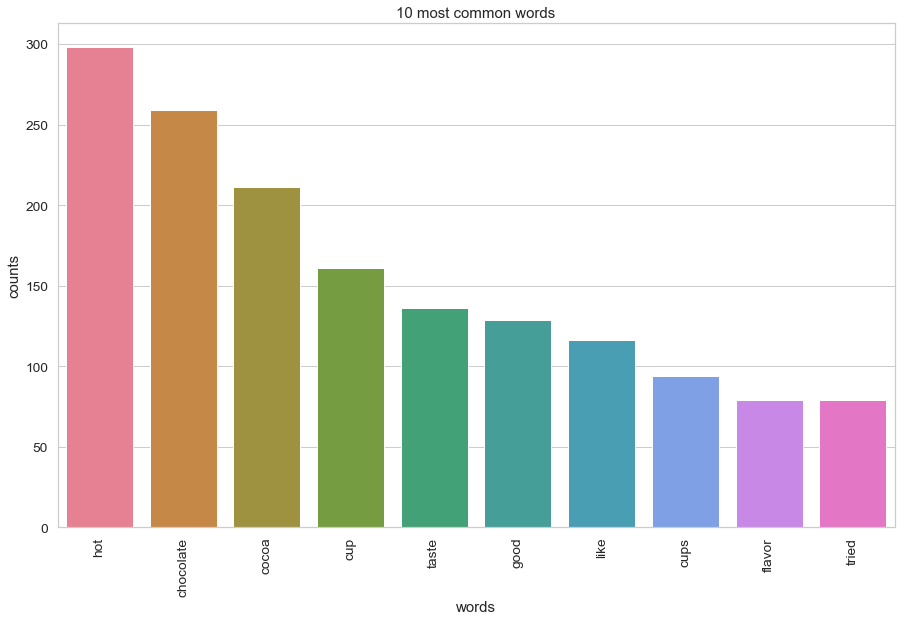

Topics found via LDA:

Topic #0:
chocolate hot cups tried cocoa dark milk keurig cup good

Topic #1:
hot like taste cocoa best cup tried chocolate sweetener artificial

Topic #2:
taste hot chocolate cup little sugar cups keurig great cocoa

Topic #3:
hot cocoa good chocolate cup like product really taste water

Topic #4:
cocoa hot cup chocolate good taste flavor great peppermint like


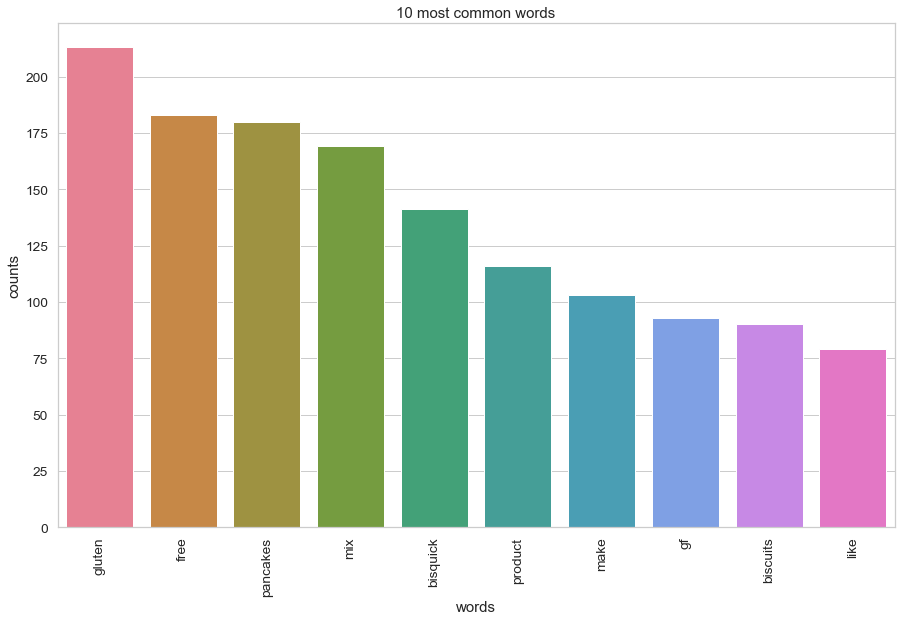

Topics found via LDA:

Topic #0:
mix bisquick pancakes gluten gf free like product great chicken

Topic #1:
gluten free bisquick mix pancakes product like make taste thank

Topic #2:
gluten free pancakes product bisquick mix make box good biscuits

Topic #3:
pancakes gluten free make good mix biscuits great bisquick box

Topic #4:
gf pancakes make biscuits mix product bisquick gluten good box


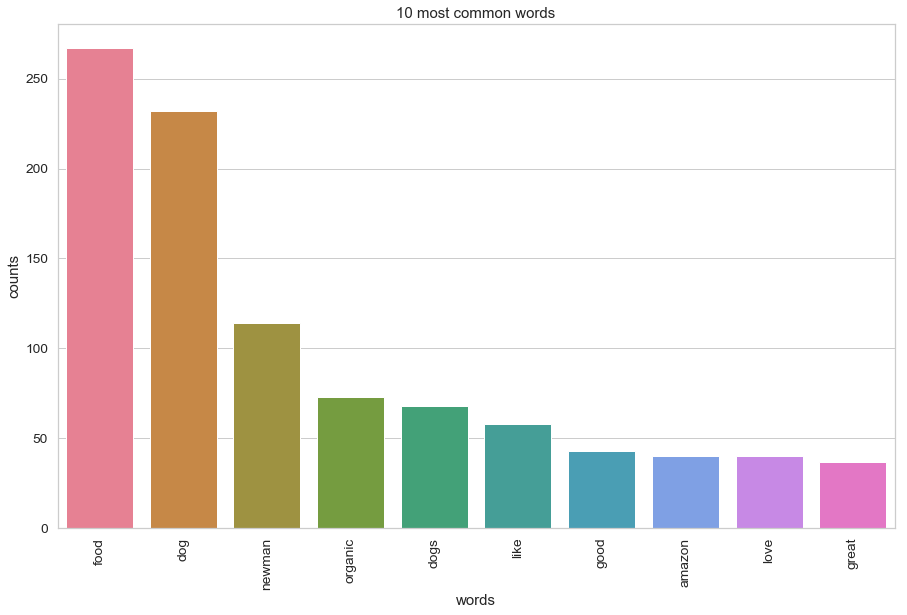

Topics found via LDA:

Topic #0:
food dog newman organic like dogs amazon brand good old

Topic #1:
dog food newman dogs price problems ve best good like

Topic #2:
food dog newman dogs like organic love eat healthy really

Topic #3:
dog food bag new corn brand loves eat opened kibble

Topic #4:
food dog newman great organic dogs love good bag loves


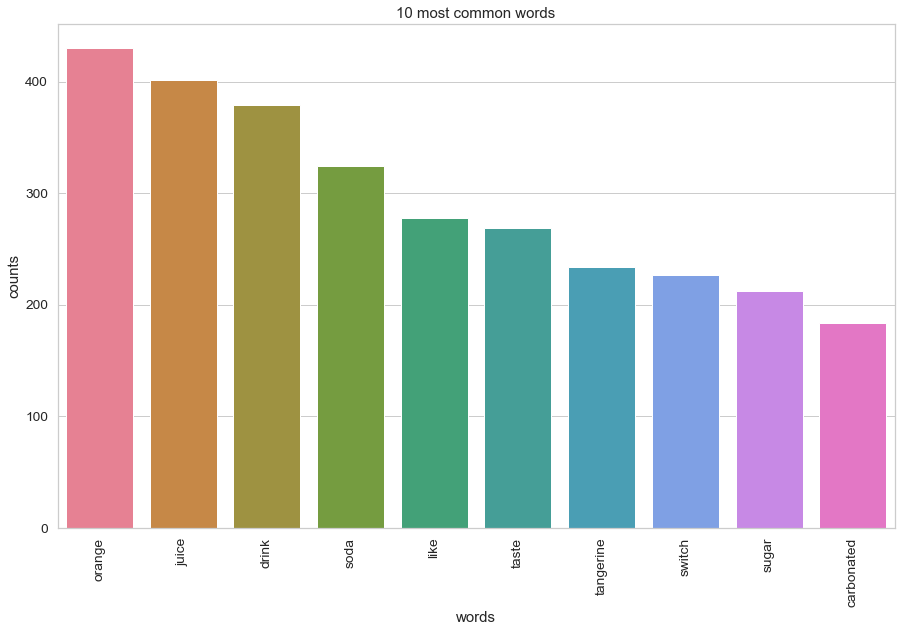

Topics found via LDA:

Topic #0:
juice orange soda drink like tangerine switch taste sugar carbonated

Topic #1:
drink taste like buy orange liked sweet nice stars flavor

Topic #2:
drink orange soda taste juice like switch tangerine sugar sweet

Topic #3:
really good switch product worth tangy smooth thing definitely end

Topic #4:
juice orange drink product tangerine want flavor carbonated price soda


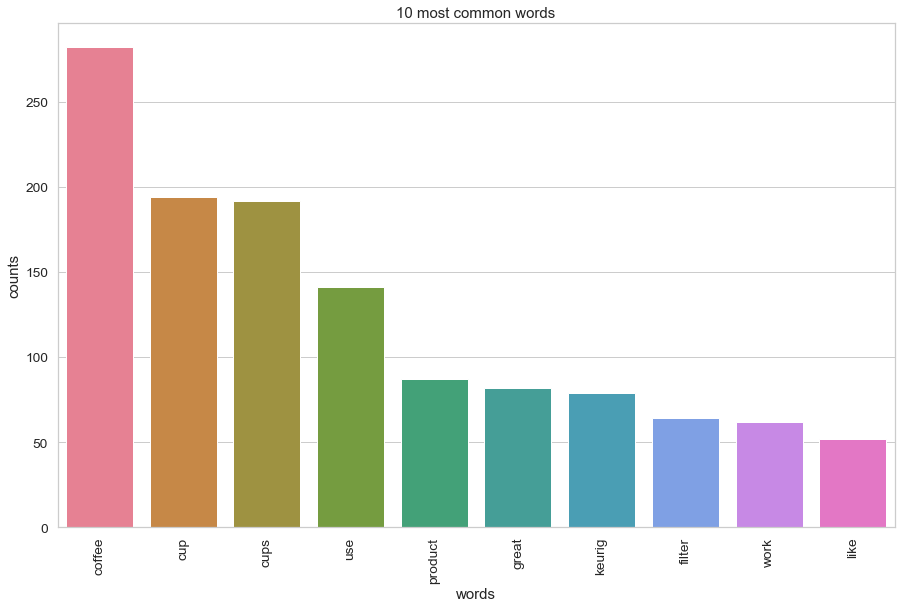

Topics found via LDA:

Topic #0:
coffee use cups keurig product cup great work favorite disposakups

Topic #1:
coffee cup cups use product great filter little good make

Topic #2:
cup cups product coffee work keurig grounds machine great cap

Topic #3:
coffee cup cups use filter keurig great product disposable lid

Topic #4:
cups coffee use cup like easy product lid great advertised


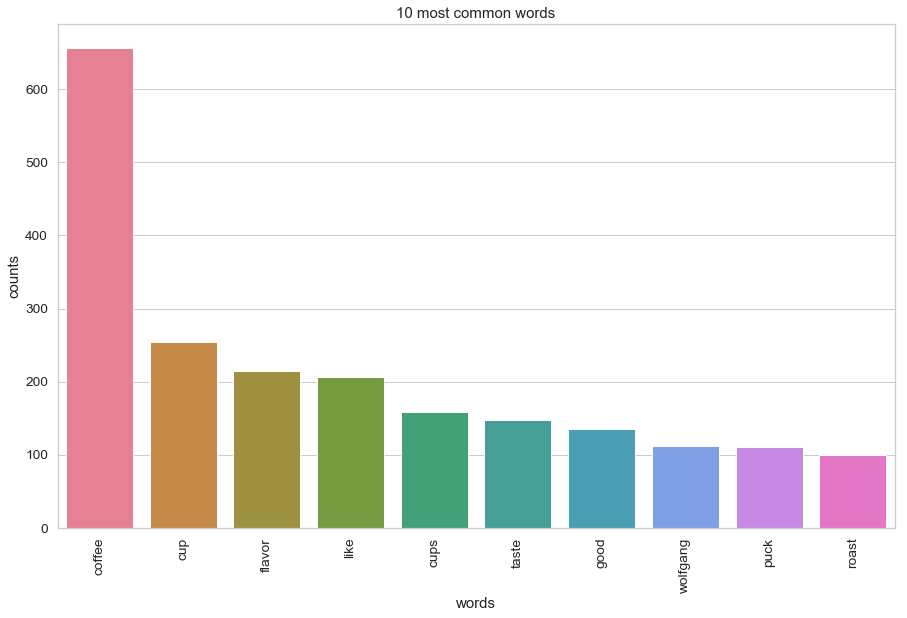

Topics found via LDA:

Topic #0:
coffee cup like flavor cups bold strong favorite tried taste

Topic #1:
coffee flavor cup puck wolfgang cups good roast strong product

Topic #2:
coffee cups like cup taste good wolfgang puck great flavor

Topic #3:
coffee cup like flavor taste flavored coconut wolfgang puck love

Topic #4:
coffee cup good like flavor best bold cups vanilla taste


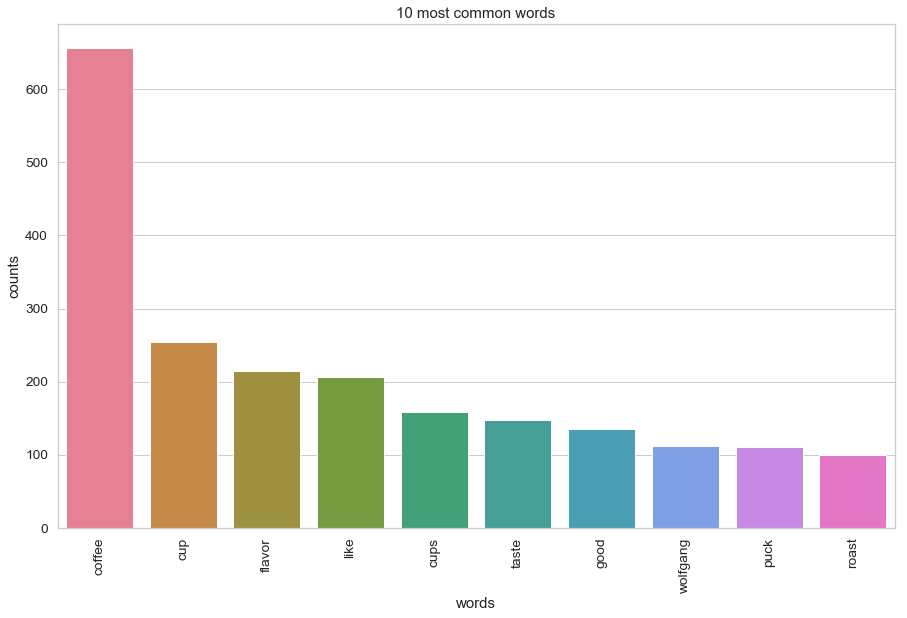

Topics found via LDA:

Topic #0:
coffee cup flavor flavored like taste cups roast coconut great

Topic #1:
coffee cup like flavor roast good wolfgang bold puck taste

Topic #2:
coffee flavor good puck wolfgang mountain green cups like blend

Topic #3:
coffee amazon flavored good like flavor cups cup keurig favorite

Topic #4:
coffee cup like cups taste flavor great tried strong ve


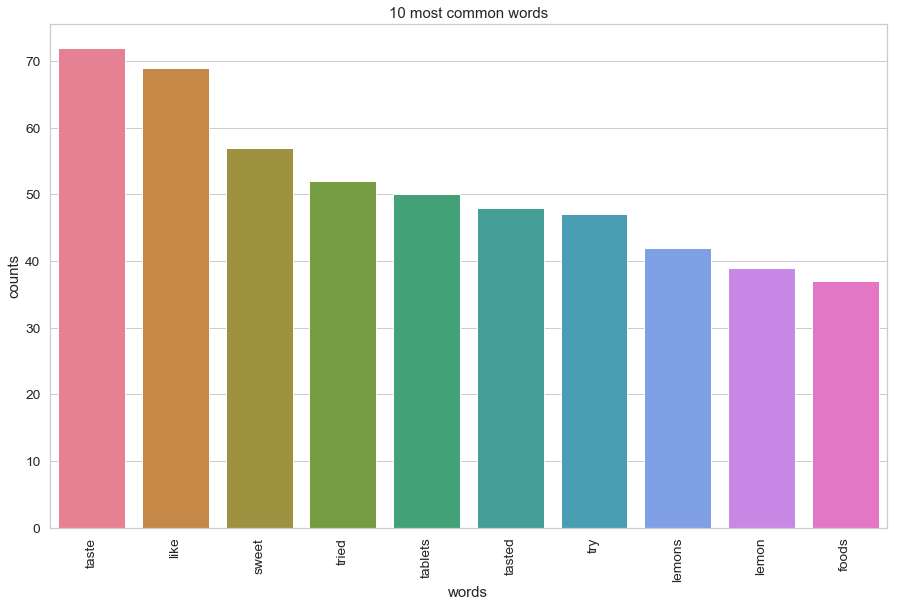

Topics found via LDA:

Topic #0:
like taste tried sweet tablet tasted tablets foods lemons sour

Topic #1:
tablets try worked sweet product trying time friends work really

Topic #2:
try taste tasted lemon really sweet ate tried lemons like

Topic #3:
product buy make works eat tablets work taste actual fruit

Topic #4:
taste like fun lemons tasted lemon beer tongue limes try


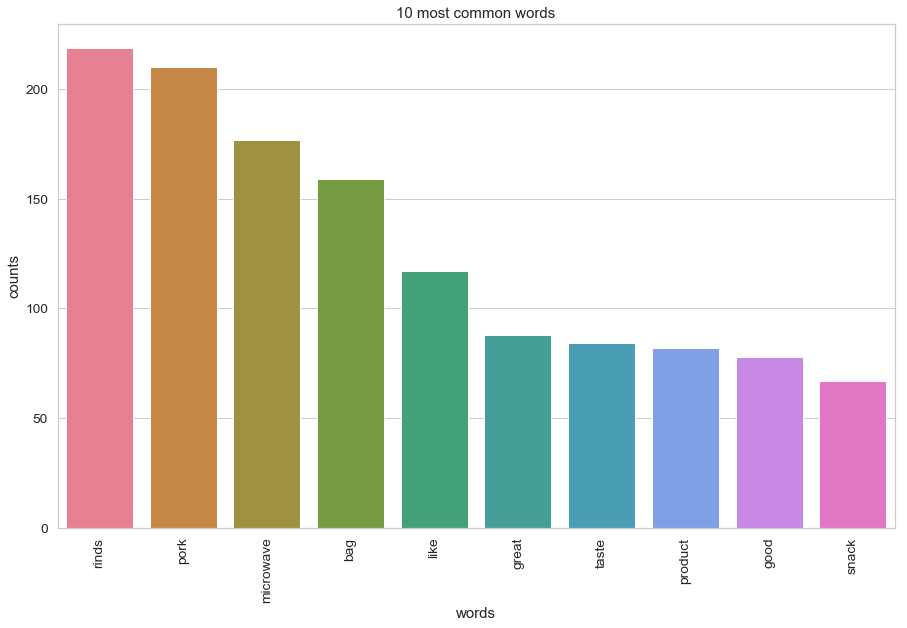

Topics found via LDA:

Topic #0:
taste low great rinds snack cook diet carb bag good

Topic #1:
rinds microwave pork bag like spicy love taste popcorn cook

Topic #2:
bag product good taste microwave cook pork time ve bags

Topic #3:
bag pork rinds store great microwave product buy item amazon

Topic #4:
rinds pork microwave like bag hot fresh product great snack


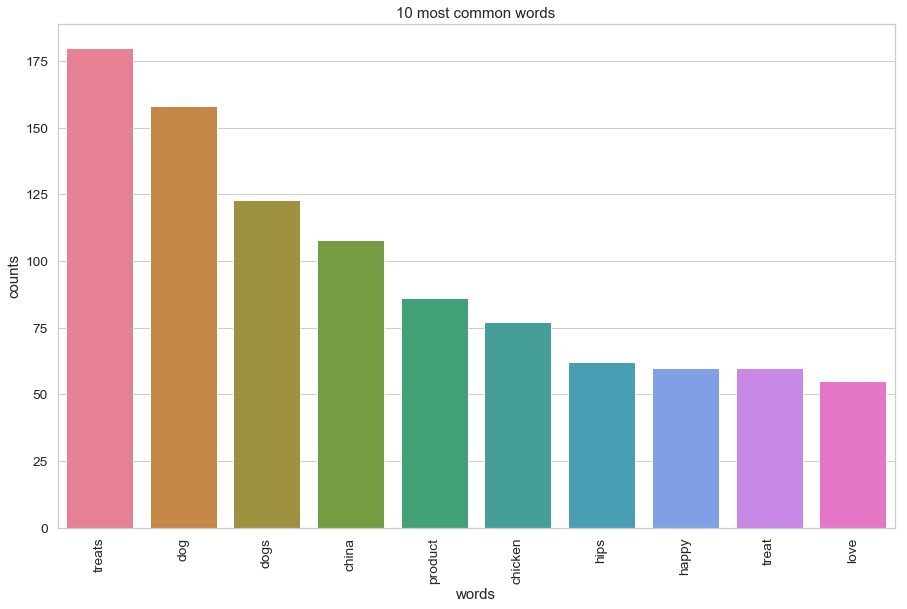

Topics found via LDA:

Topic #0:
dog treats dogs treat chicken china product love loves good

Topic #1:
treats china dog product dogs amazon buy products happy chicken

Topic #2:
dog treats product hips happy china diarrhea dogs loves food

Topic #3:
dogs dog treats hips loves like duck love happy chicken

Topic #4:
products treats dogs jerky fda chicken china food product dog


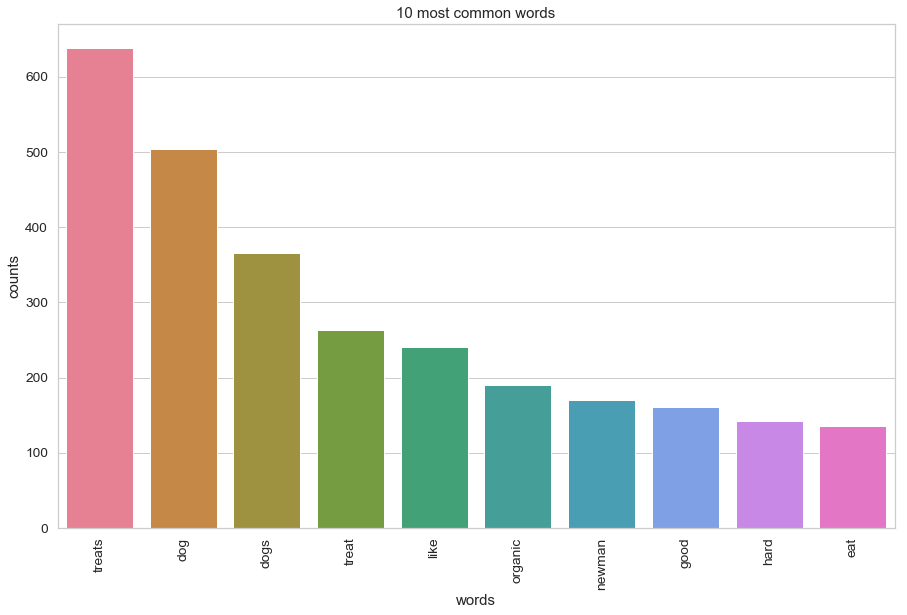

Topics found via LDA:

Topic #0:
treats dogs treat dog organic bag hard know new half

Topic #1:
treats dog dogs like treat hard eat organic little really

Topic #2:
treats dog dogs like treat organic eat really hard smell

Topic #3:
treats dog newman dogs treat ingredients organic good eat food

Topic #4:
treats dog dogs like treat good organic newman break hard


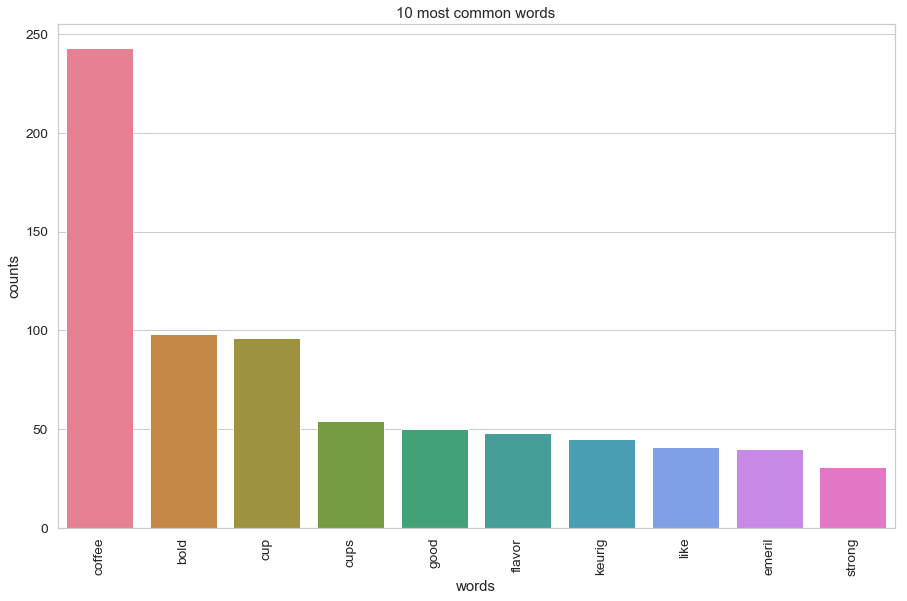

Topics found via LDA:

Topic #0:
coffee bold cup good emeril easy emerils keurig like best

Topic #1:
bold cups taste coffee flavor cup favorite bitter keurig far

Topic #2:
coffee bold cup flavor like emeril strong bitter tried keurig

Topic #3:
coffee cup bold good cups love keurig order strong big

Topic #4:
coffee cup cups good grounds time great box amazon keurig


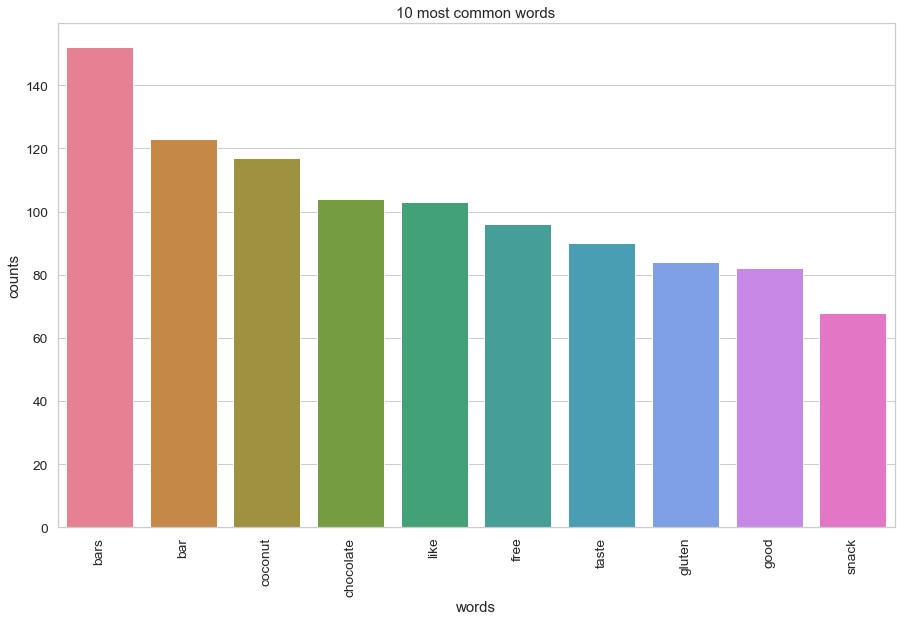

Topics found via LDA:

Topic #0:
bar bars like coconut chocolate free taste gluten cookie snack

Topic #1:
free gluten bars coconut good snack bar chocolate products pamela

Topic #2:
coconut good taste snack chocolate gluten like bars free bar

Topic #3:
bars like free bar grams coconut taste pretty calories gluten

Topic #4:
bars taste coconut chocolate good bar like snack free healthy


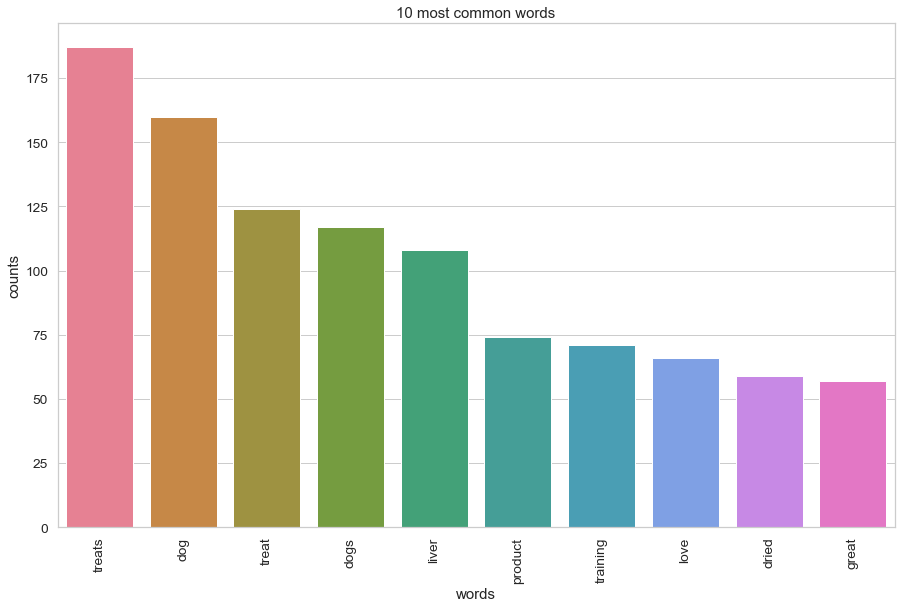

Topics found via LDA:

Topic #0:
treats dog treat great liver pieces product freeze dried training

Topic #1:
treats dog dogs liver treat product love training dried freeze

Topic #2:
treats like really size pieces training ve great bucket white

Topic #3:
treat product used use size training freeze dried liver order

Topic #4:
dog treats loves great treat food dogs day love price


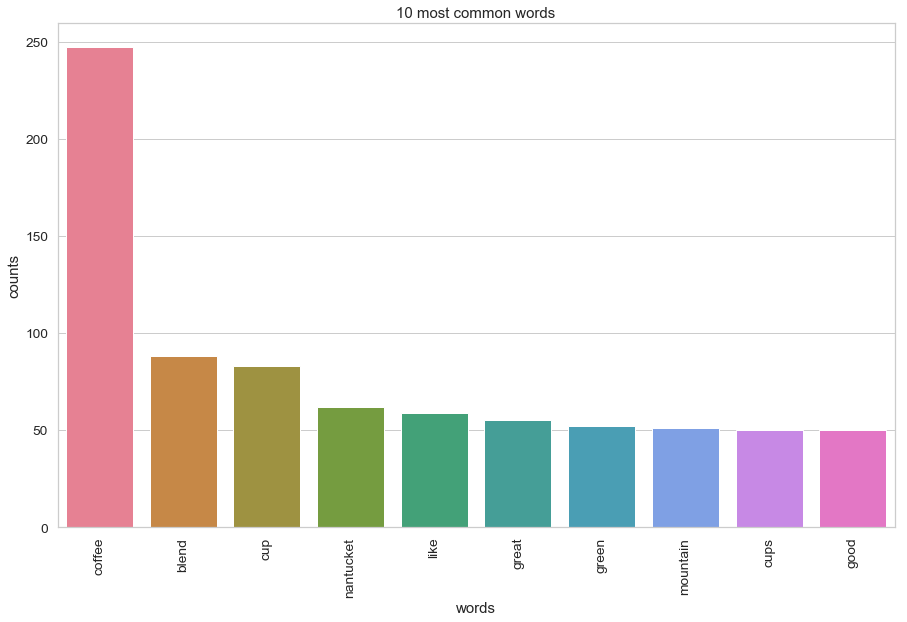

Topics found via LDA:

Topic #0:
coffee blend nantucket cup green good mountain flavor like love

Topic #1:
coffee cup like buy way use make ve light bold

Topic #2:
great coffee amazon good buy like product tried favorite cups

Topic #3:
coffee blend tried like great nantucket cups amazon keurig cup

Topic #4:
coffee cup blend mountain best great green nantucket like cups


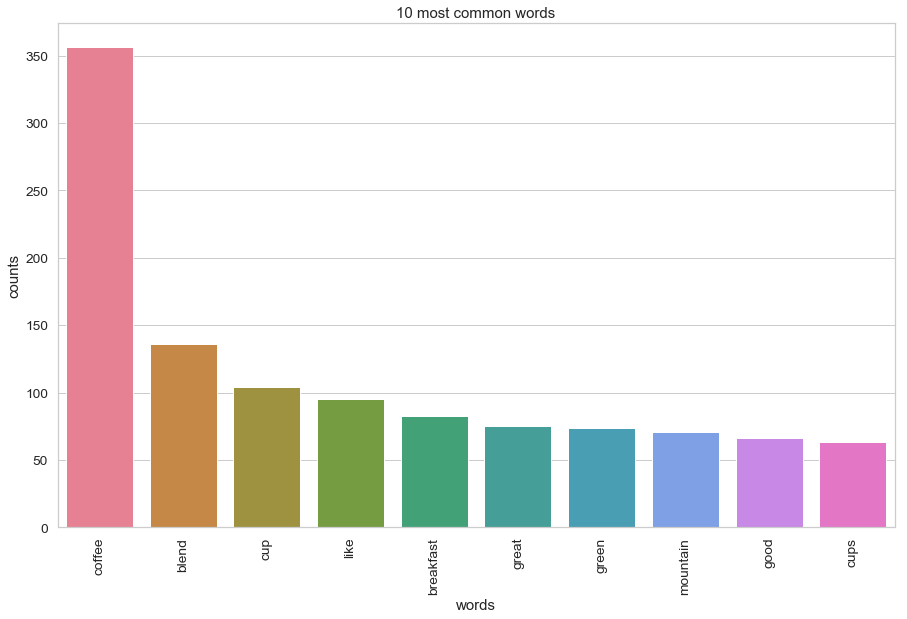

Topics found via LDA:

Topic #0:
coffee blend like breakfast cup strong taste flavor cups green

Topic #1:
flavor probably nice really buy hesitate vendors overpriced amazon products

Topic #2:
coffee good great amazon cup product price keurig free order

Topic #3:
coffee blend green mountain cup love great cups breakfast strong

Topic #4:
product coffee cup received price cups 24 sent vendor favorite


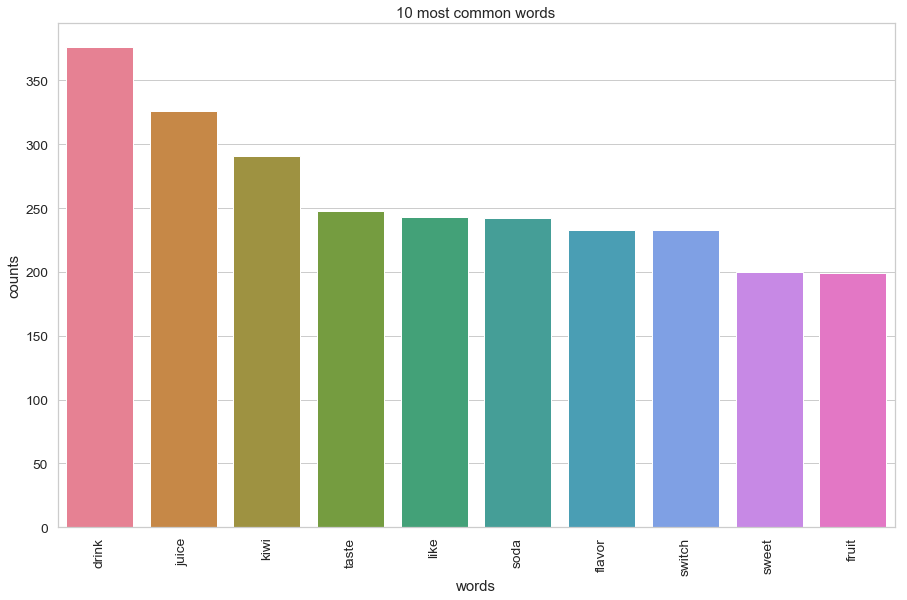

Topics found via LDA:

Topic #0:
flavor kiwi switch cherry taste berry black drink like try

Topic #1:
drink juice kiwi like taste flavor sweet soda good fruit

Topic #2:
juice fruit sugar drink href http switch sweet added sodas

Topic #3:
flavor juice drink switch apple flavors kiwi little soda fruit

Topic #4:
drink juice soda kiwi switch taste like sugar berry fruit


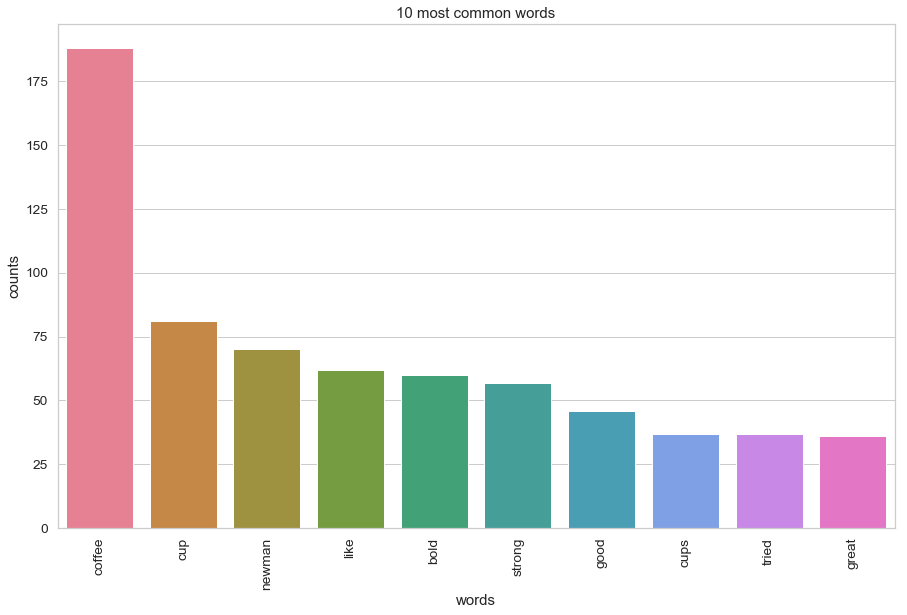

Topics found via LDA:

Topic #0:
strong coffee bitter like smooth flavor blend taste cup weak

Topic #1:
coffee great cup newman really blend special keurig 80 favorite

Topic #2:
coffee cup good newman like strong cups keurig tried bold

Topic #3:
cup coffee newman strong taste great cups nice like little

Topic #4:
bold coffee newman like cup taste extra blend good tried


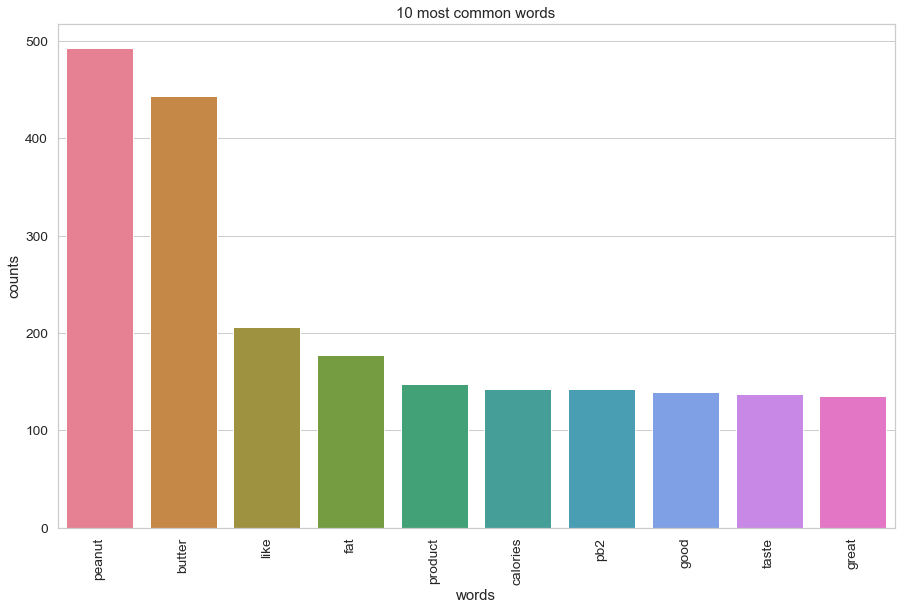

Topics found via LDA:

Topic #0:
good use protein smoothies great price pb tasting tastes using

Topic #1:
peanut pb like butter taste pb2 water fat chocolate better

Topic #2:
peanut butter fat calories like product love good great pb2

Topic #3:
peanut butter product like good protein fat flavor great really

Topic #4:
peanut butter like pb2 jar water product great mix powder


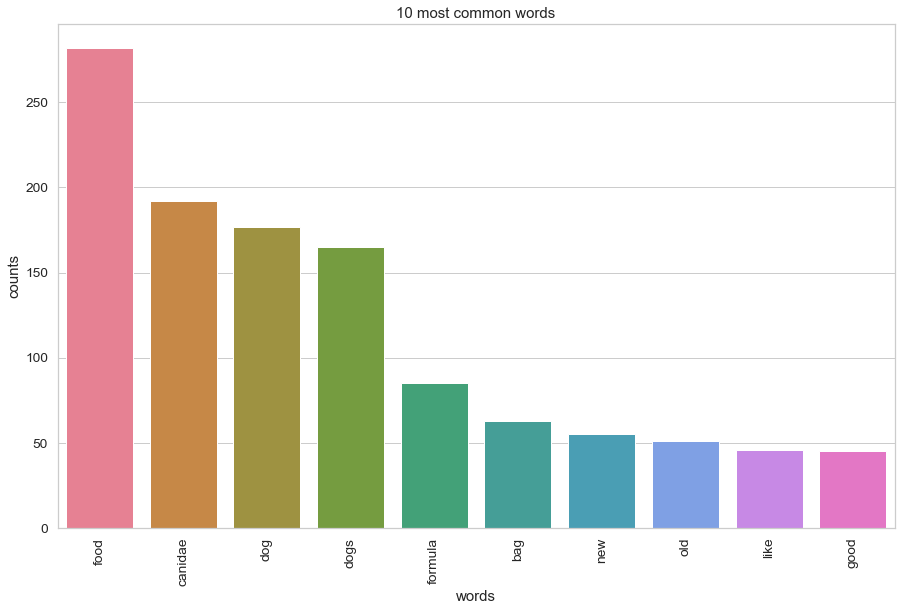

Topics found via LDA:

Topic #0:
food dog canidae dogs bag formula quality old change like

Topic #1:
food dog canidae dogs foods good like ingredients chicken day

Topic #2:
food canidae dogs formula amazon dog years product price bag

Topic #3:
food dogs canidae formula dog new bag changed old years

Topic #4:
food dogs dog canidae brand weight good old healthy coats


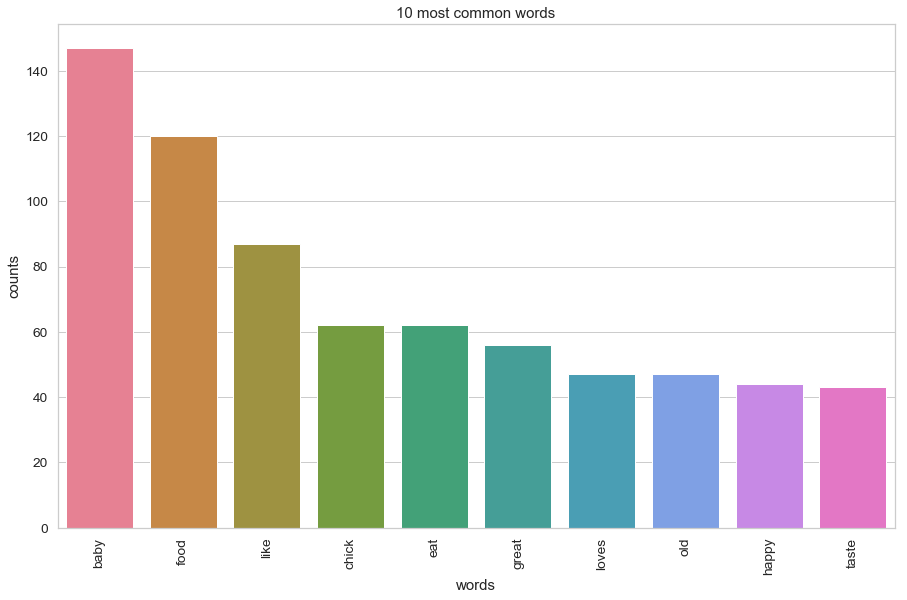

Topics found via LDA:

Topic #0:
baby like tried taste eat product happy great beef pouches

Topic #1:
food baby chick like love old texture loves make eat

Topic #2:
baby food like great chick time happy salmon old daughter

Topic #3:
product eat great really love like boys food loved salmon

Topic #4:
food baby eat loves son easy organic sure stage great


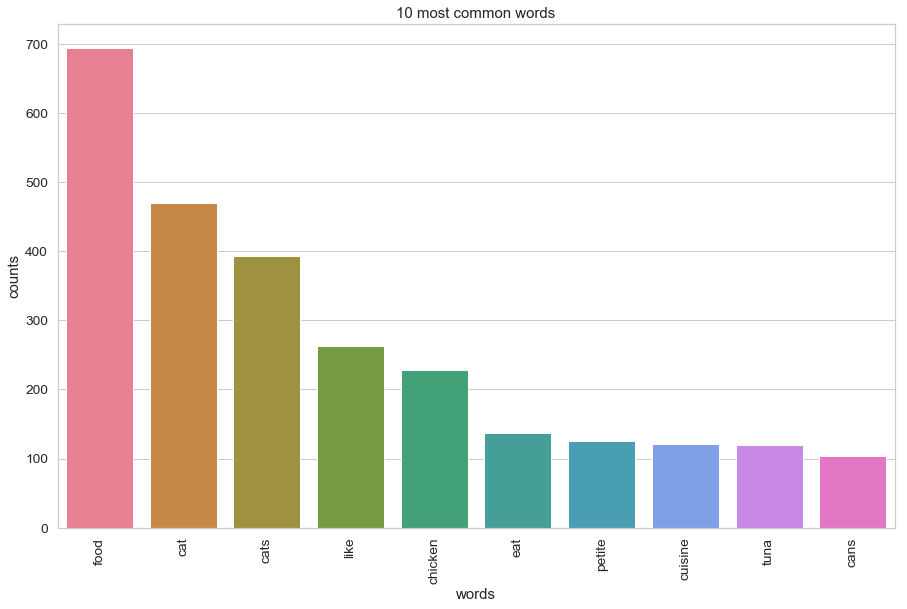

Topics found via LDA:

Topic #0:
food cat chicken cats like pot pie eat good cans

Topic #1:
food cat cats fish petite tuna like eat cuisine chicken

Topic #2:
menadione food pet toxic contains banned toxicity substance sodium consumption

Topic #3:
food cats like cat good dry eat canned looks tuna

Topic #4:
food cats cat cuisine like petite cans product tuna eat


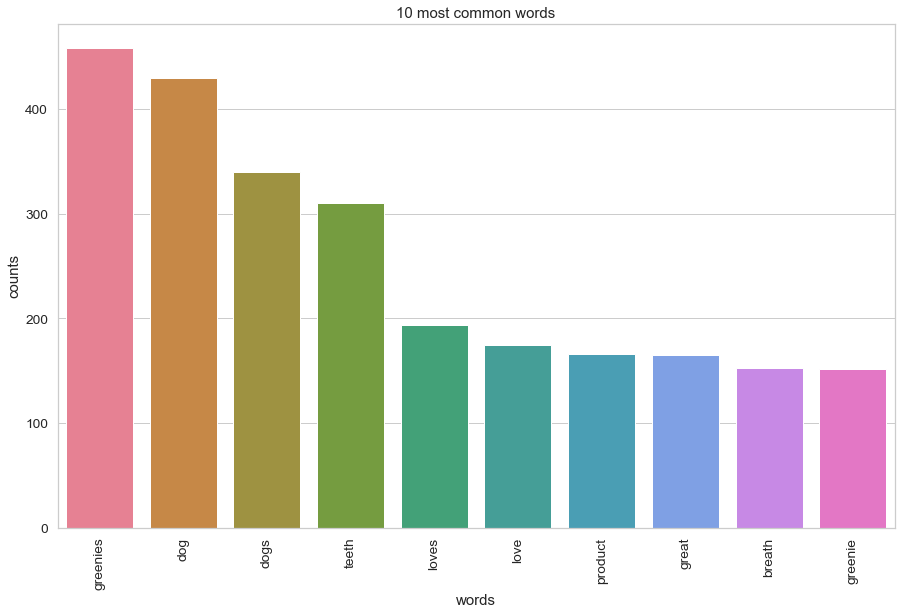

Topics found via LDA:

Topic #0:
greenies dogs love buy great treat day dog best loves

Topic #1:
greenies dog teeth dogs loves amazon price breath great box

Topic #2:
dog greenies dogs product treats loves love teeth greenie good

Topic #3:
dogs great breath love teeth small product treat greenies size

Topic #4:
dog teeth greenies dogs greenie treat loves time day years


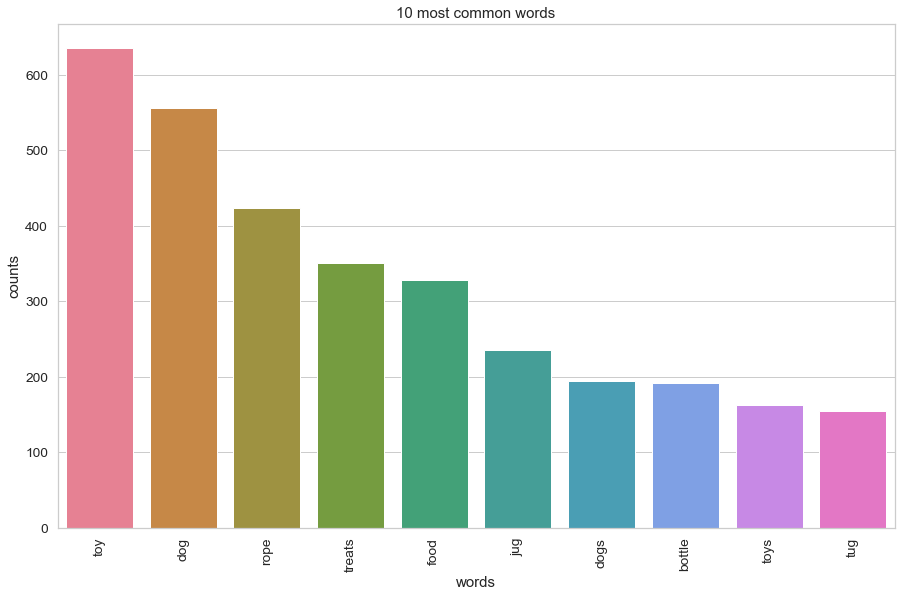

Topics found via LDA:

Topic #0:
toy rope dog treats bottle food kibble minutes loves rubber

Topic #1:
dog toy food bottle rope treats toys jug great minutes

Topic #2:
toy dog rope food treats old plastic dogs busy toys

Topic #3:
toy treats jug dog dogs rope tug food loves kibble

Topic #4:
dog toy rope jug treats tug food like toys time


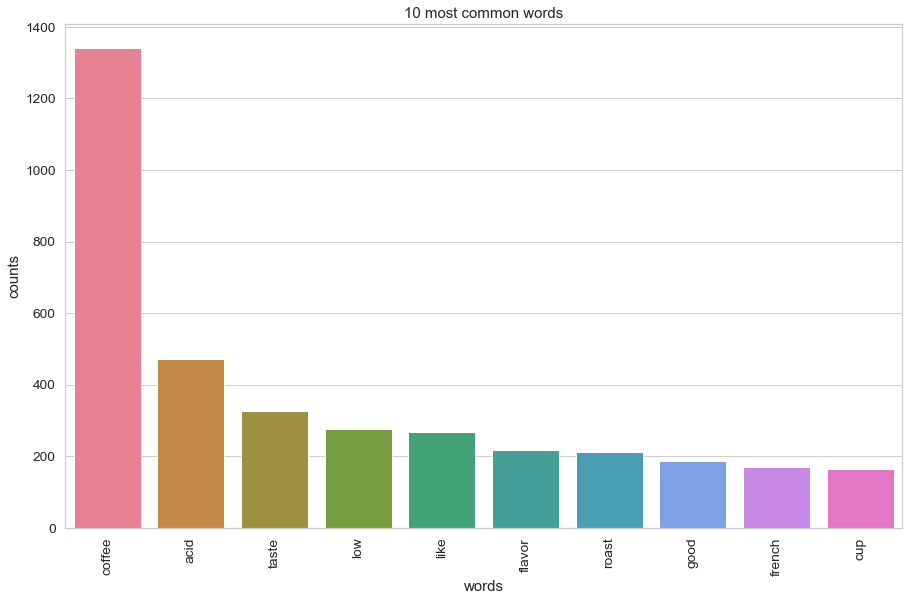

Topics found via LDA:

Topic #0:
bitterness difference thoughts purist sip breakfast sunday creamer free puroast

Topic #1:
coffee acid low taste roast french like flavor cup good

Topic #2:
coffee taste acid low like product flavor bitter puroast water

Topic #3:
coffee acid taste flavor cup stomach good drink roast low

Topic #4:
coffee like acid taste good flavor low roast puroast drink


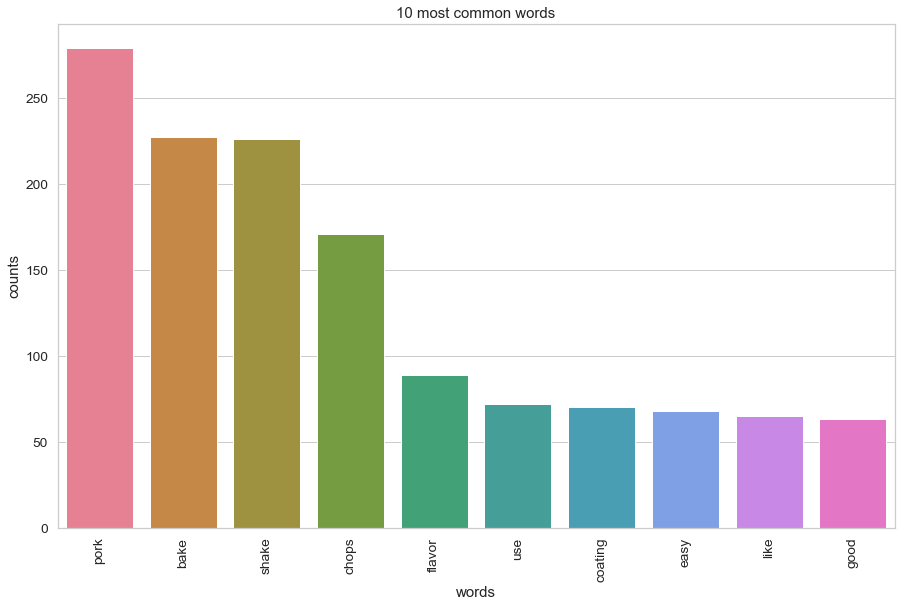

Topics found via LDA:

Topic #0:
pork coating chops shake product use bake flavor minutes mix

Topic #1:
pork bake shake good flavor chops meat time really package

Topic #2:
bake meat shake chops flavor pork mix used coating nice

Topic #3:
pork crumbs chops packet bake flavor use salt cooking cooked

Topic #4:
pork shake bake chops easy flavor use like bag product


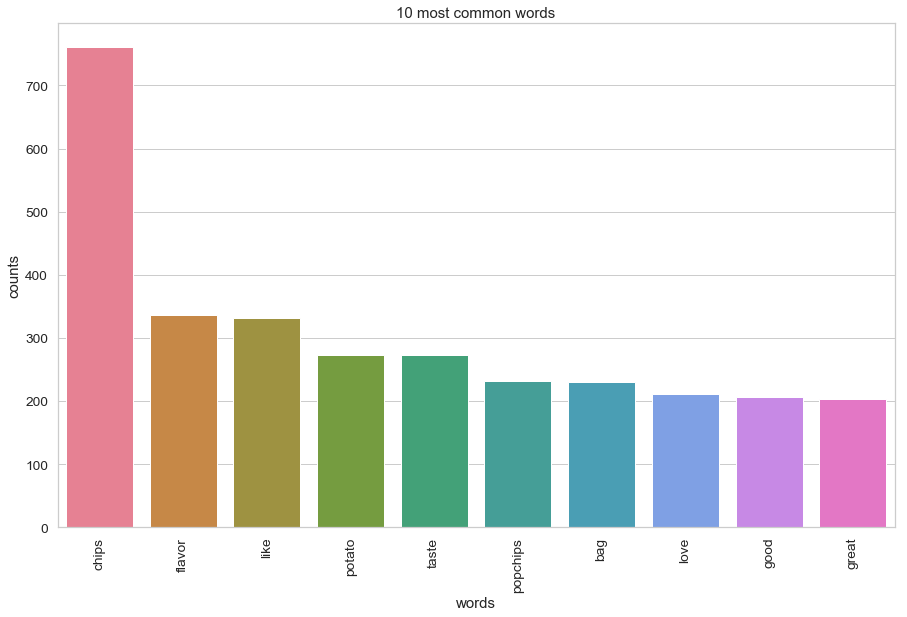

Topics found via LDA:

Topic #0:
sweet potato chips flavor bag flour chip fat rice calories

Topic #1:
chips like flavor popchips taste potato chip sweet good tried

Topic #2:
potato sweet chips salty popchips snack fat like flavor good

Topic #3:
amazon purchased chips salt vinegar original potato box flavors jalapeno

Topic #4:
chips flavor taste like great love bag popchips potato good


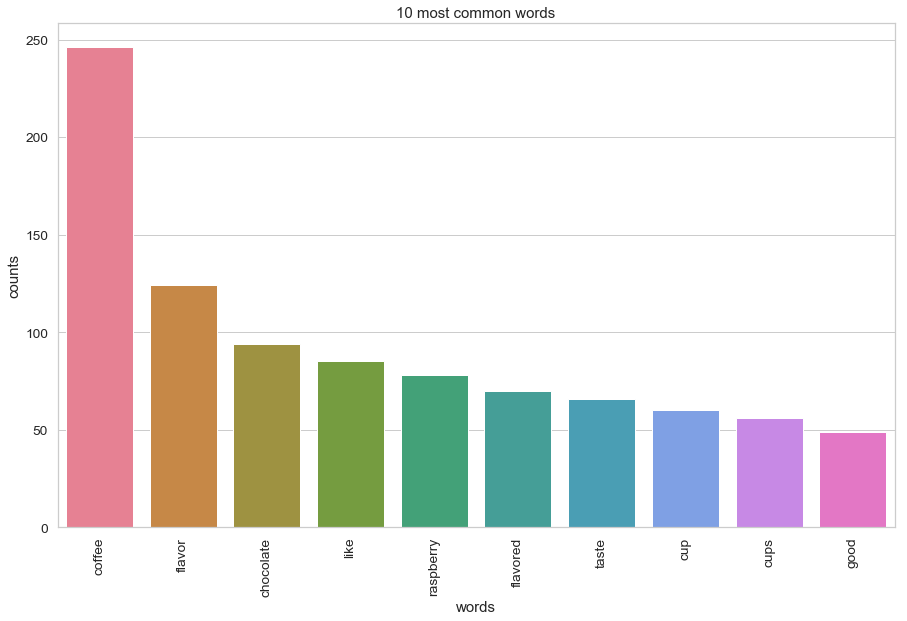

Topics found via LDA:

Topic #0:
vanilla french cup flavor houtte van good cafe ve thought

Topic #1:
coffee flavor flavored like chocolate raspberry taste vanilla cup good

Topic #2:
coffee chocolate flavor raspberry cups great coffees van houtte like

Topic #3:
coffee like taste chocolate flavor love raspberry amazon cups cup

Topic #4:
coffee flavor cups great cup box ve good pleased favorite


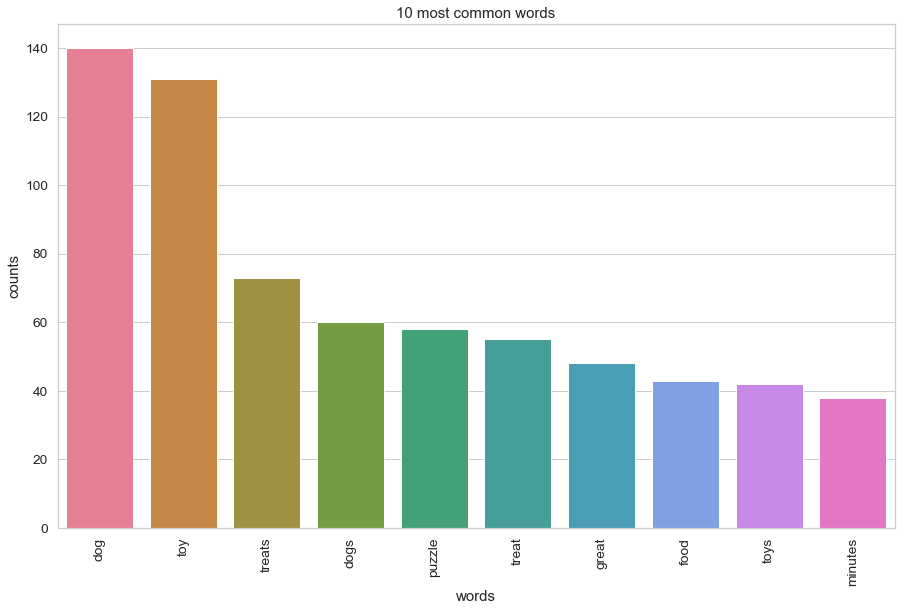

Topics found via LDA:

Topic #0:
dog toy treat treats great dogs cups loves yellow puzzle

Topic #1:
toy dog treat food treats great toys minutes puzzle took

Topic #2:
dog toy treats dogs puzzle food easy play time treat

Topic #3:
toys dog dogs puzzle toy ball good moon treat product

Topic #4:
toy dog treats minutes puzzle dogs time fun cups challenging


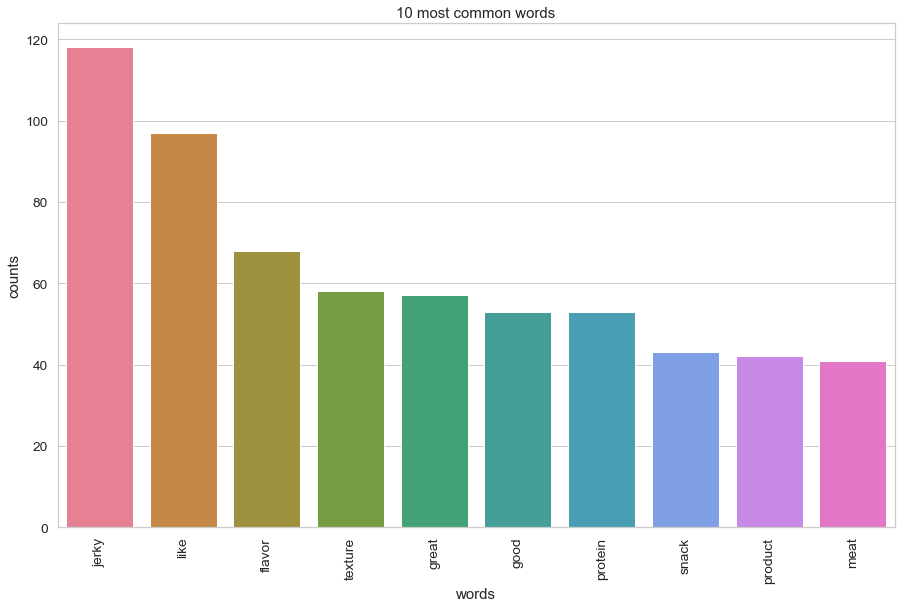

Topics found via LDA:

Topic #0:
jerky product texture meat great flavor vegetarian love like taste

Topic #1:
like jerky great good texture protein snack flavor real vegetarian

Topic #2:
great jerky snack good meat like protein flavor texture strips

Topic #3:
like jerky flavor texture protein taste company good garlic product

Topic #4:
jerky vegan product like tried great delicious strips good flavor


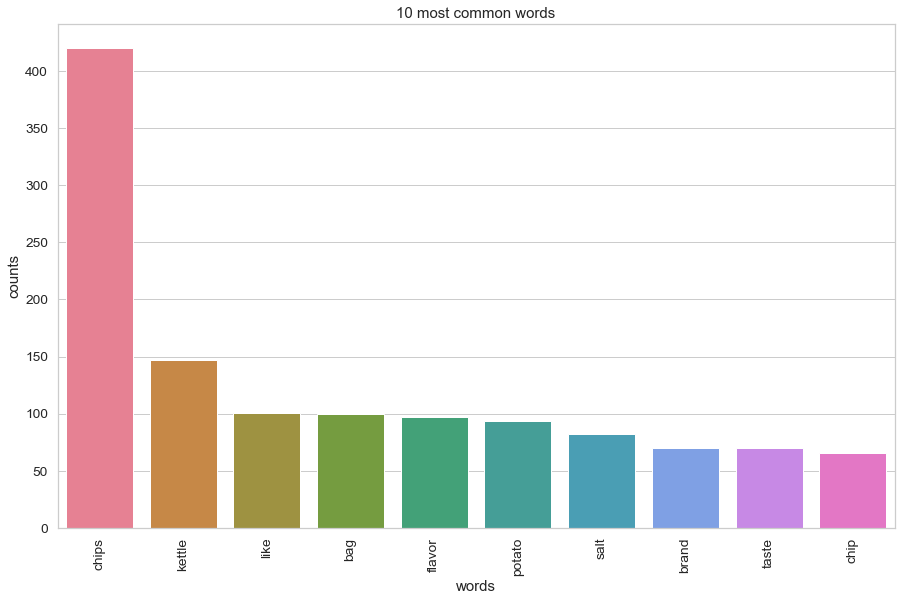

Topics found via LDA:

Topic #0:
chips chip kettle salt like bags bag taste vinegar brand

Topic #1:
chips kettle brand potato bag amazon flavor salt bags brands

Topic #2:
chips like flavor kettle best love salt taste bags great

Topic #3:
chips kettle bag good like spicy flavor potato taste great

Topic #4:
chips vinegar salt potato like taste chip bag kettle good


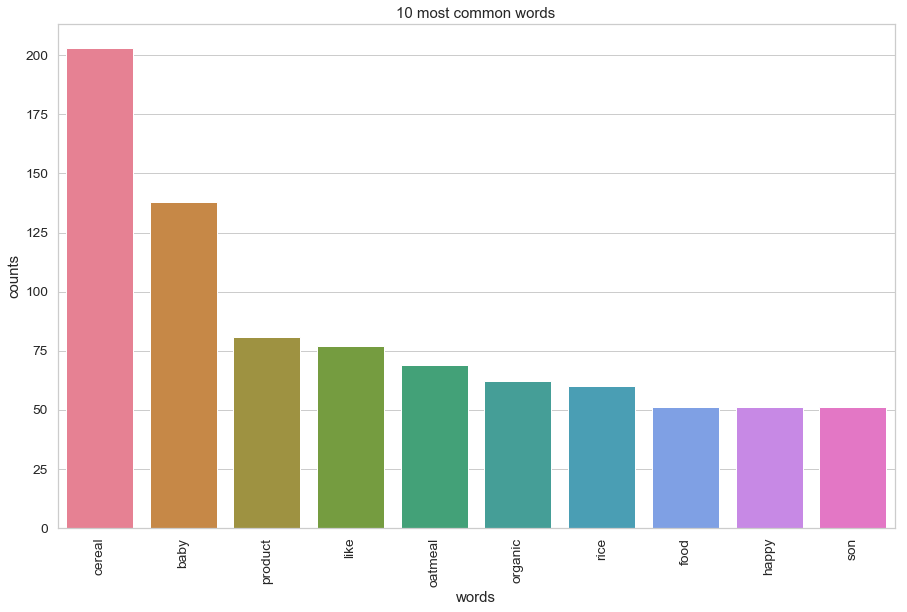

Topics found via LDA:

Topic #0:
cereal oatmeal baby like rice product happybellies love son organic

Topic #1:
cereal baby oatmeal happy rash food diaper multigrain bellies probiotics

Topic #2:
cereal baby product like son organic smell good oatmeal great

Topic #3:
cereal baby food probiotics product rice organic great babies like

Topic #4:
cereal baby product dha best loves cereals probiotics like organic


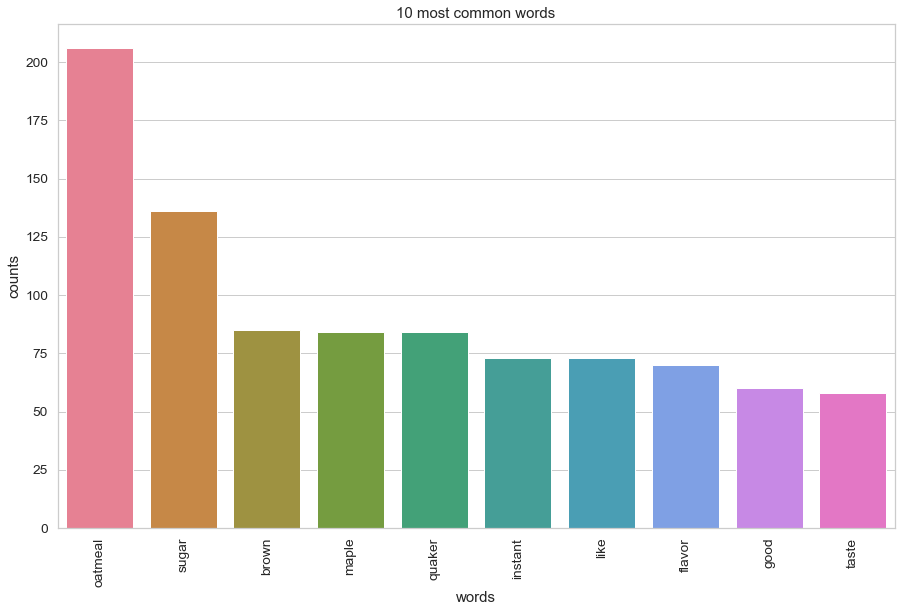

Topics found via LDA:

Topic #0:
sugar oatmeal quaker brown maple product oats flavor instant good

Topic #1:
away fruit breakfast home reduce hit noticed summer fresh item

Topic #2:
oatmeal good taste flavor little make time quaker like eating

Topic #3:
oatmeal sugar maple instant brown breakfast quaker flavor water like

Topic #4:
oatmeal like sugar box great really good easy maple brown


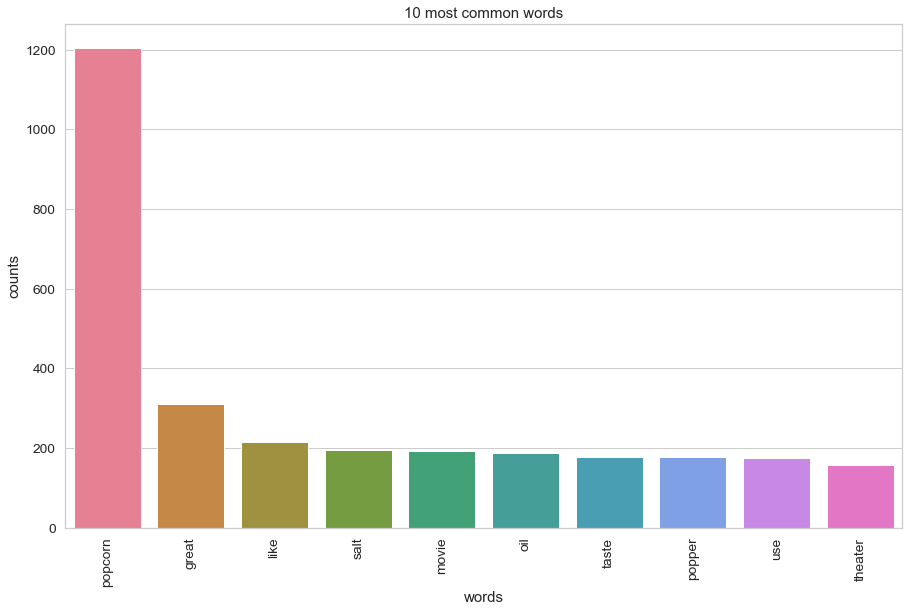

Topics found via LDA:

Topic #0:
popcorn like theater movie salt oil taste pop popped great

Topic #1:
popcorn great northern oil case love kids taste product packets

Topic #2:
popcorn salt great oil taste use machine like best movie

Topic #3:
popcorn great machine packs use good stale time oil product

Topic #4:
popcorn great popper like movie use tastes northern good theater


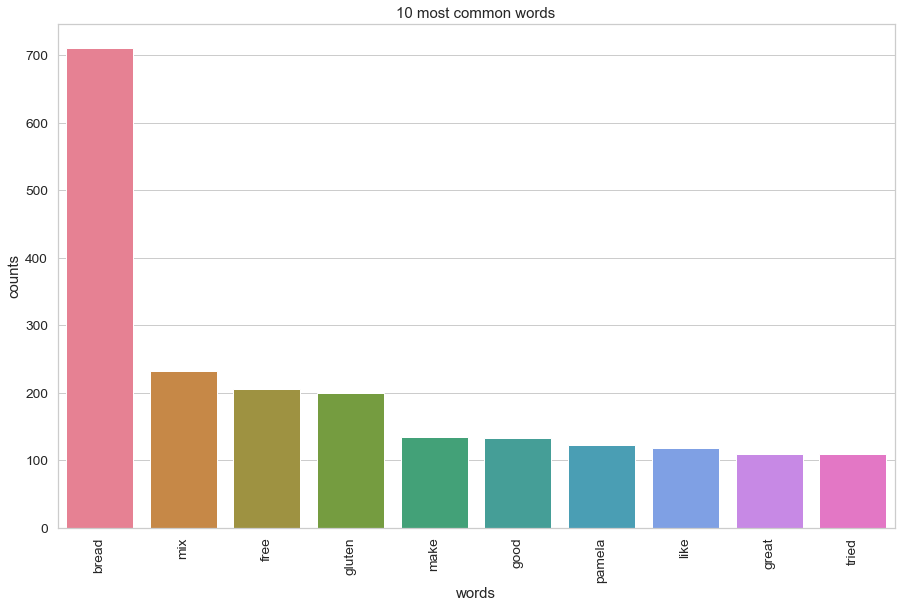

Topics found via LDA:

Topic #0:
bread free gluten mix make pamela use tried crust pizza

Topic #1:
bread mix like make gluten good great free tried easy

Topic #2:
bread product wheat mix great loaf make free good machine

Topic #3:
bread mix pamela son tried products flour loaf wheat machine

Topic #4:
bread free gluten mix good pamela taste like gf texture


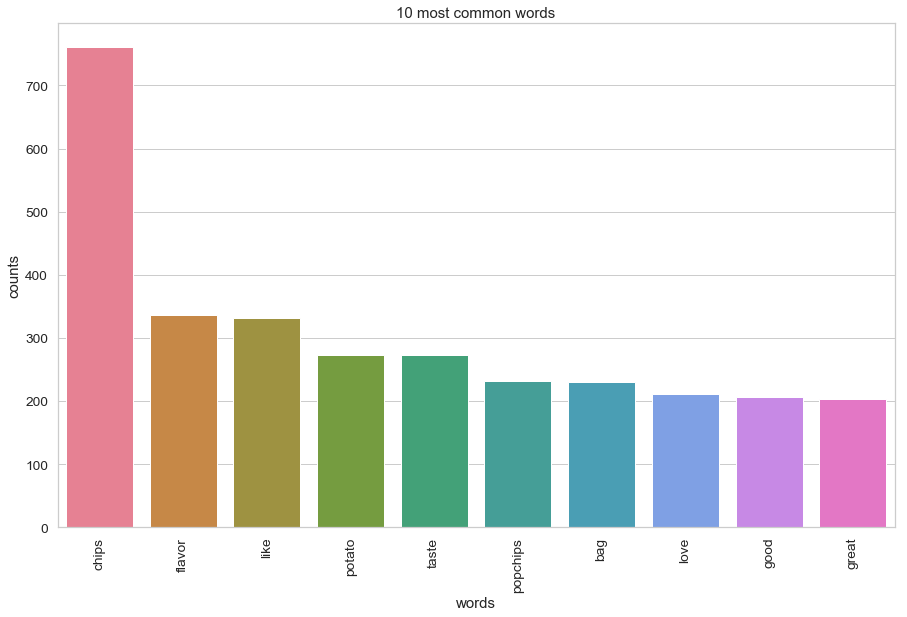

Topics found via LDA:

Topic #0:
chips bag great taste good flavor snack bags like eat

Topic #1:
chips flavor like potato salt taste sweet chip popchips bag

Topic #2:
chips like potato sweet love taste popchips great flavor bag

Topic #3:
chips good flavor love bag product eat tasty tried yummy

Topic #4:
chips popchips flavor like taste good bag great fat love


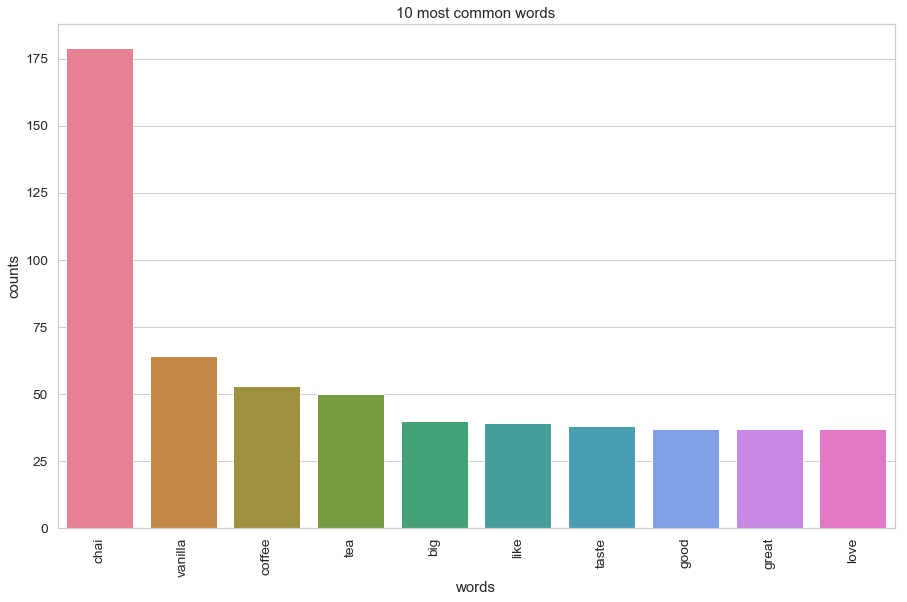

Topics found via LDA:

Topic #0:
product big great drink amazon train delicious way sugar tea

Topic #1:
chai vanilla tea good taste coffee best big great train

Topic #2:
chai vanilla coffee like tea make love milk caffeine hot

Topic #3:
good sweet vanilla time ordered tea brand cup sister conversation

Topic #4:
chai good cafe border pretty treat ve mix taste tasty


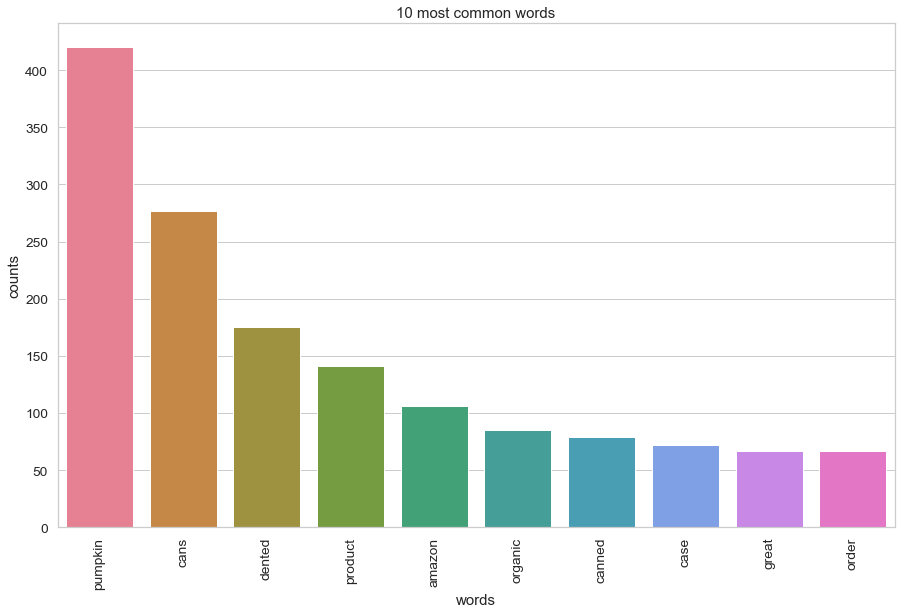

Topics found via LDA:

Topic #0:
cans dented pumpkin product case amazon 12 price damaged ordered

Topic #1:
pumpkin good product dogs cans dog amazon dents price organic

Topic #2:
pumpkin canned product cans organic store great case amazon taste

Topic #3:
pumpkin product dented cans organic great used ve canned dogs

Topic #4:
pumpkin cans amazon dented product organic order like canned condition


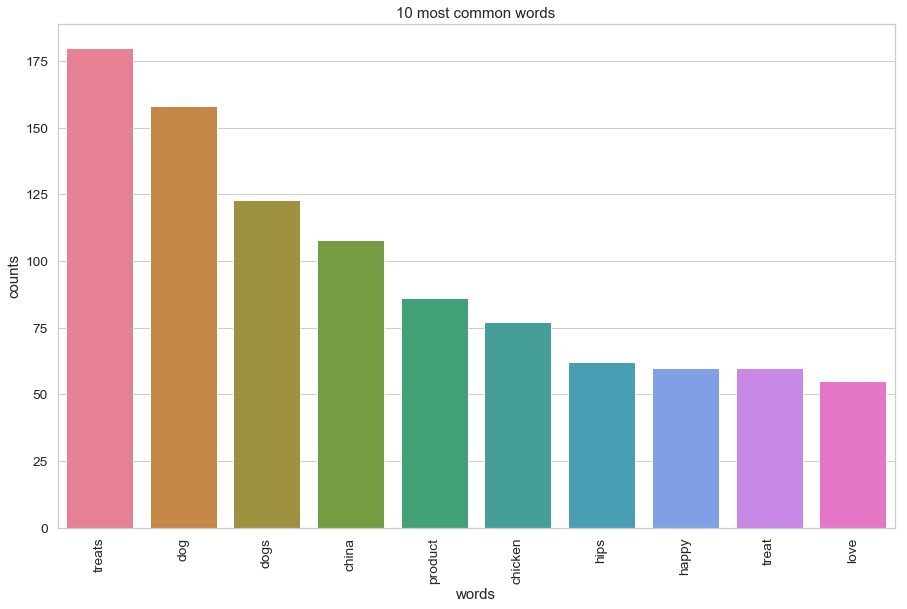

Topics found via LDA:

Topic #0:
treats dog dogs hips happy product china treat chicken love

Topic #1:
dog treats hips product really loves good dogs great happy

Topic #2:
china dog dogs products treats jerky chicken product food dogswell

Topic #3:
dog amazon china treats food dogs product buy dogswell like

Topic #4:
treats dog china dogs buy chicken love giving treat product


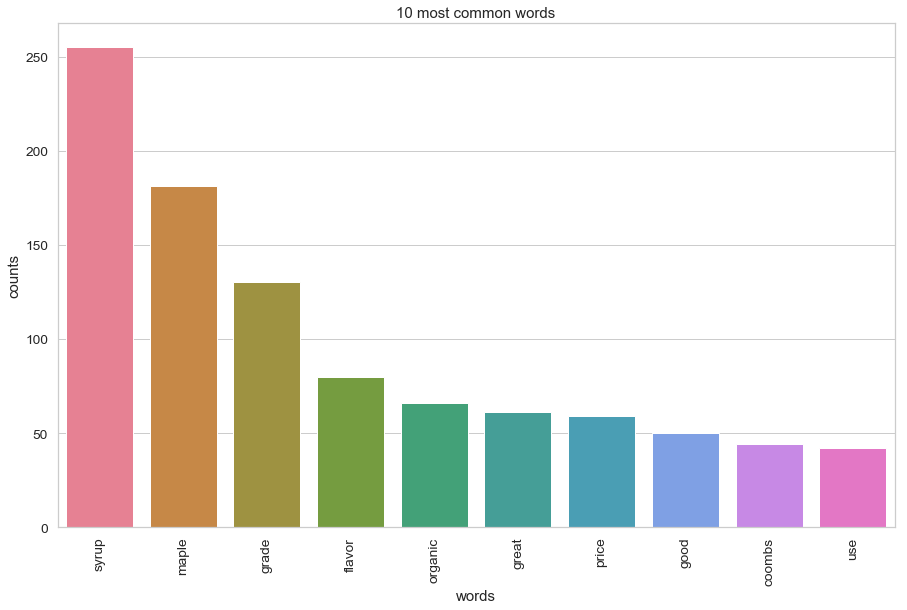

Topics found via LDA:

Topic #0:
syrup maple good use great organic price grocery product pancakes

Topic #1:
syrup maple grade flavor great organic love price family coombs

Topic #2:
syrup maple price flavor grade organic better great like pancakes

Topic #3:
syrup maple grade flavor organic family product coombs taste ve

Topic #4:
syrup maple grade taste coombs good bottle better flavor great


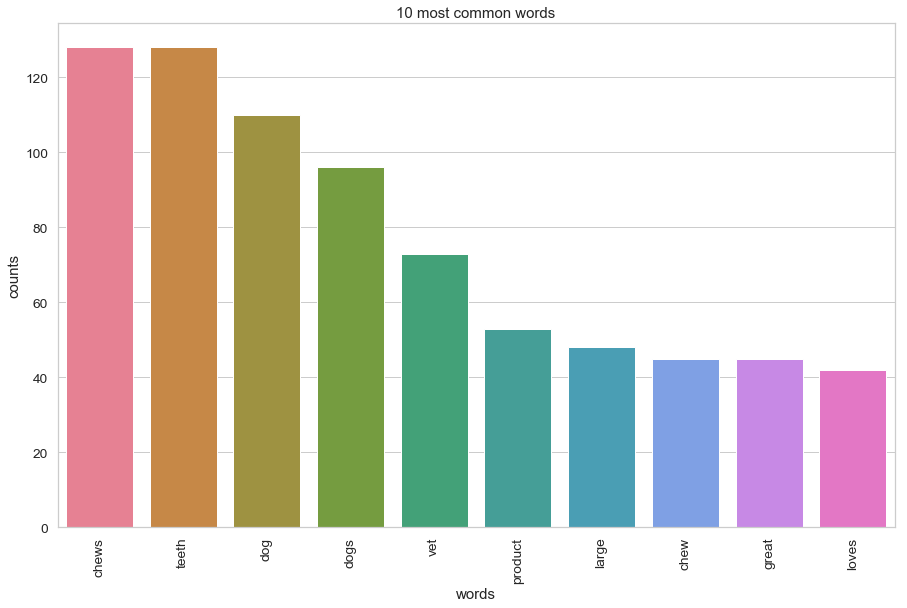

Topics found via LDA:

Topic #0:
dogs chews teeth dog large chew love vet dental great

Topic #1:
teeth chews dog loves clean great dogs product vet large

Topic #2:
chews dogs chew teeth love large dog product amazon bag

Topic #3:
dog teeth vet chews time chew loves product dogs good

Topic #4:
half dog loves cut thickness vet love use product golden


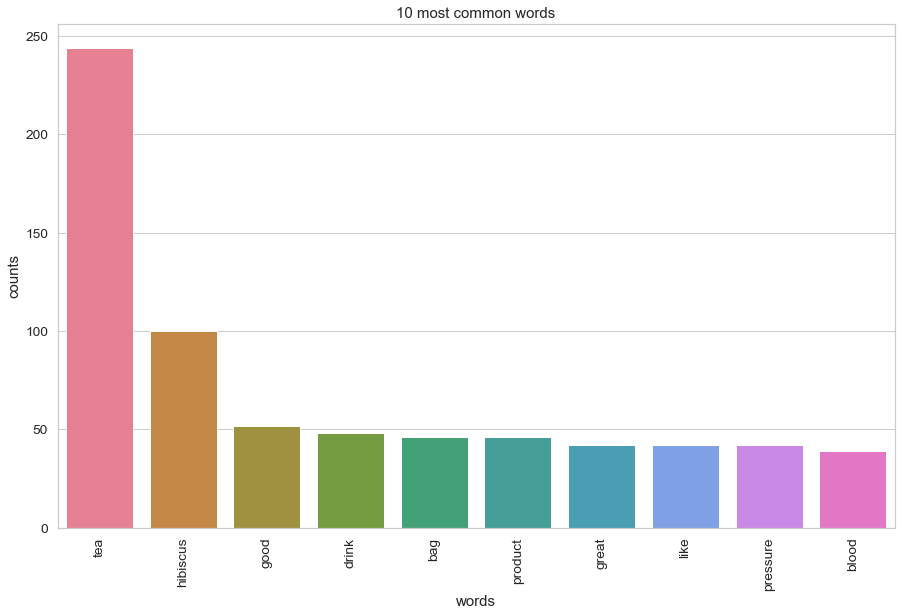

Topics found via LDA:

Topic #0:
tea hibiscus bag product really flowers good try great use

Topic #1:
tea hibiscus pressure blood great bag day drinking sure product

Topic #2:
tea hibiscus drink good like great petals water taste bag

Topic #3:
tea great love quality product red taste make blood pressure

Topic #4:
tea hibiscus good product like blood pressure amazon davidson drink


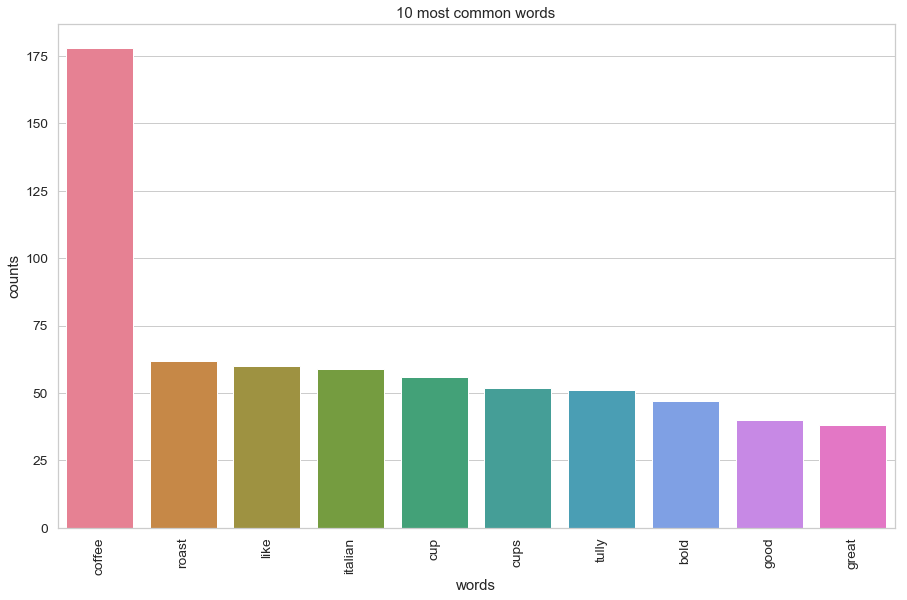

Topics found via LDA:

Topic #0:
coffee favorite like good tully strong cups bold italian buy

Topic #1:
coffee strong roast cup dark rich product little ve best

Topic #2:
coffee cups like cup italian tully roast great love bold

Topic #3:
coffee cup roast great italian like flavor taste good bold

Topic #4:
coffee bold roast italian tully amazon cups like good keurig


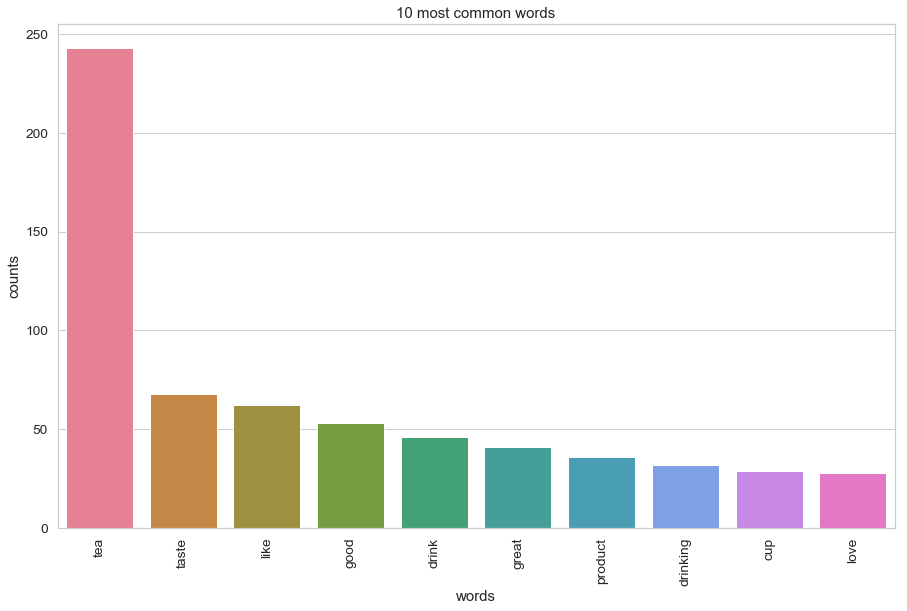

Topics found via LDA:

Topic #0:
tea taste good smell sleep like great product hours really

Topic #1:
tea taste great like drink works product time better bought

Topic #2:
tea taste like drink flavor love used drinking product drank

Topic #3:
tea like good drink drinking taste cup help love days

Topic #4:
tea night hot flashes work great helped easy box substances


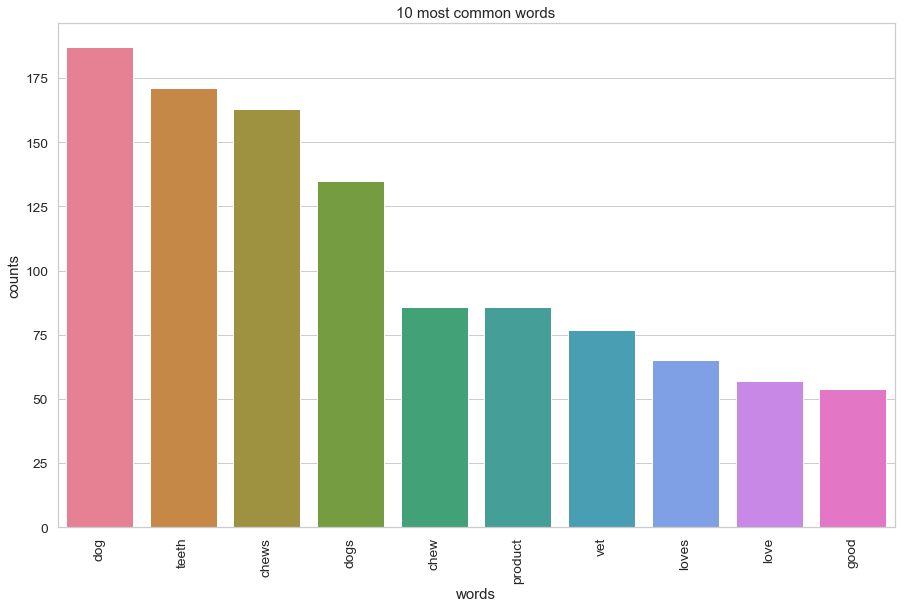

Topics found via LDA:

Topic #0:
chews dogs dog vet chew teeth love good size month

Topic #1:
chews dogs product teeth dog chew vet good large bag

Topic #2:
teeth dogs dog chews vet good great chew loves love

Topic #3:
dog teeth chews product loves dogs chew old great clean

Topic #4:
dog chews teeth dogs chew product love like loves really


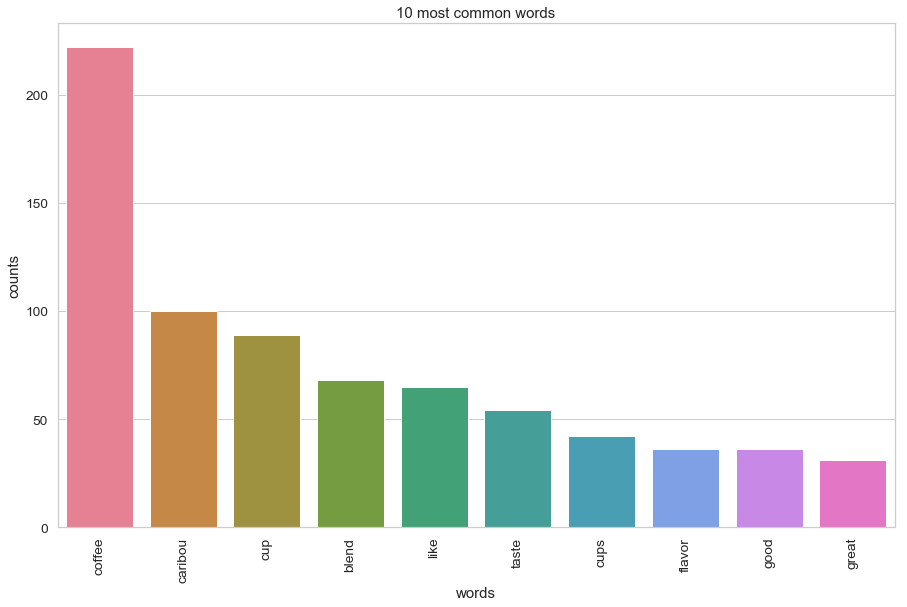

Topics found via LDA:

Topic #0:
coffee caribou cup keurig blend best taste look good great

Topic #1:
coffee like cup taste blend caribou flavor bold tried medium

Topic #2:
coffee caribou cup cups great blend good tasting love price

Topic #3:
coffee caribou order product best cups like taste cup blend

Topic #4:
coffee caribou good cup strong smooth blend like taste box


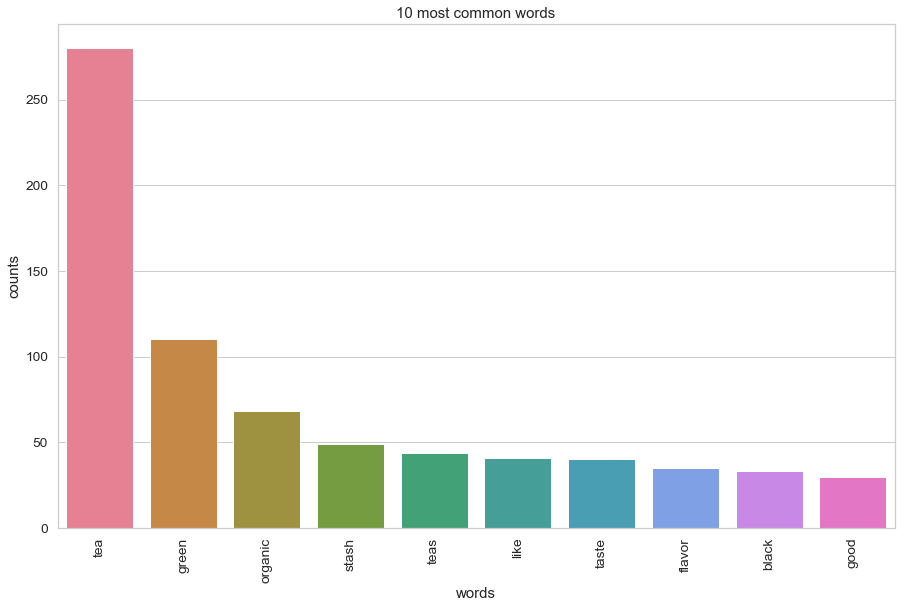

Topics found via LDA:

Topic #0:
tea green organic teas stash like grey earl flavor taste

Topic #1:
tea green organic taste flavor stash chai black good drink

Topic #2:
tea green organic drink stash amazon tastes black teas really

Topic #3:
tea lavender like teas taste honeybush flavor enjoy good black

Topic #4:
green tea enjoy way amazon stash favorite day local hot


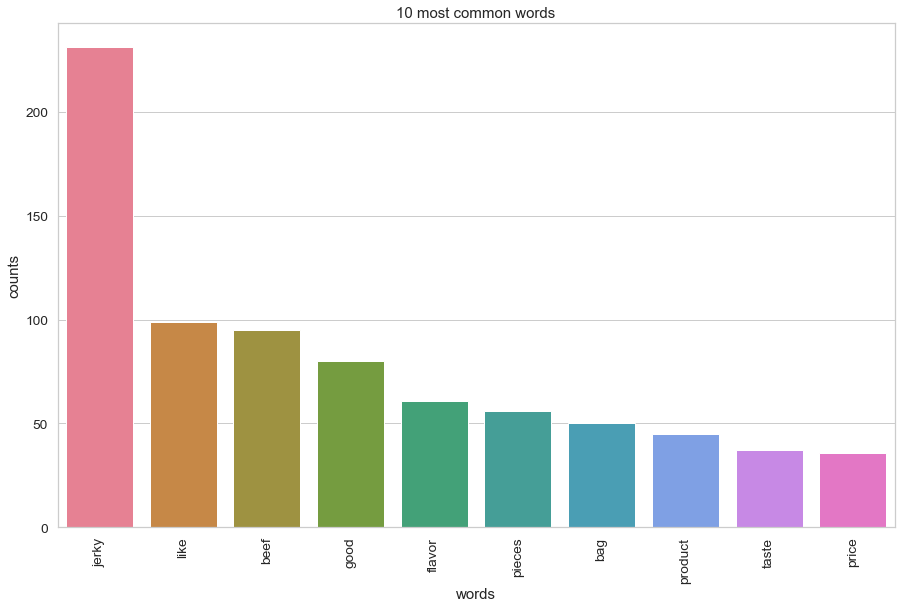

Topics found via LDA:

Topic #0:
jerky beef like good flavor pieces ve ride wild taste

Topic #1:
jerky fat beef bought price product oz natural sodium preservatives

Topic #2:
good jerky pieces buy bag hot like flavor eat jerkey

Topic #3:
jerky like flavor product beef good bag really meat hickory

Topic #4:
jerky like beef bag good pieces price best meat snack


In [114]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
import os
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 10
for product in basa_df['productid'].unique():
    product_df = basa_df[basa_df['productid'] == product]
    # Initialise the count vectorizer with the English stop words
    count_vectorizer = CountVectorizer(stop_words='english')

    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(product_df['clean_text'])
    plot_10_most_common_words(count_data, count_vectorizer)


    # Create and fit the LDA model
    lda = LDA(n_components=number_topics)
    lda.fit(count_data)
    # # this is a bit time consuming - make the if statement True
    # # if you want to execute visualization prep yourself
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)


    pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(number_topics)+ str(product_df['productid'].iloc[0]) +'.html')
    # Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)

In [46]:
b = TextBlob("toy food dogs dog good good good time rope love jug occupied")

In [47]:
b.sentiment

Sentiment(polarity=0.6499999999999999, subjectivity=0.6000000000000001)

In [100]:
basa_df['productid'].unique()[24]


'B002QWP89S'

In [101]:
product = basa_df['productid'].unique()[0]
product_df = basa_df[basa_df['productid'] == product].clean_text.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(product_df))
print(data_words[:1])


[['great', 'cutting', 'back', 'fat', 'resemble', 'regular', 'chips', 'nothing', 'like', 'extremely', 'dry', 'hard']]


In [102]:
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
id2word[0]

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]



[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]]


[[('back', 1),
  ('chips', 1),
  ('cutting', 1),
  ('dry', 1),
  ('extremely', 1),
  ('fat', 1),
  ('great', 1),
  ('hard', 1),
  ('like', 1),
  ('nothing', 1),
  ('regular', 1),
  ('resemble', 1)]]

In [103]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model =  gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [112]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=1, limit=10, step=1)

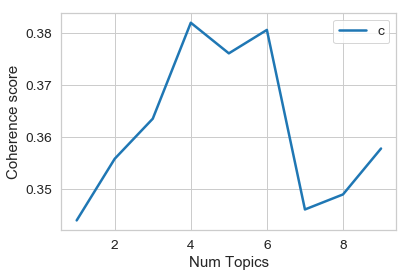

In [113]:
# Show graph
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()